In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\bipas\Downloads\Project-Housing--2---1---1-\Project-Housing_splitted\train.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.shape

(1168, 81)

In [9]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [11]:
df['Id'].nunique()

1168

In [13]:
# We can drop the column Id as it has all unique values
df.drop(columns=['Id'],inplace=True)

In [14]:
df['MSZoning'].nunique()

5

In [15]:
df['Alley'].nunique()

2

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

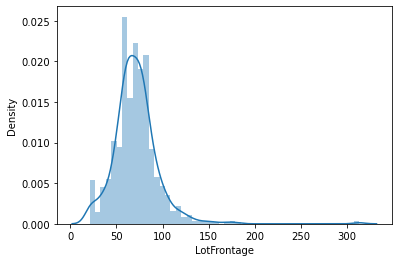

In [19]:
sns.distplot(df['LotFrontage'])

In [20]:
df['LotFrontage']=np.log1p(df['LotFrontage'])

In [21]:
df['LotFrontage'].skew()

-0.6539044427969061

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

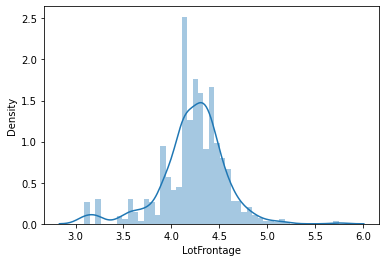

In [22]:
sns.distplot(df['LotFrontage'])

Now the distribution seems to be normal, so we can replace the missing values by the mean of the distribution

In [23]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)

In [24]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [25]:
df.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

In [26]:
df['MasVnrArea'].value_counts()

0.0      692
72.0       7
180.0      6
120.0      6
106.0      5
        ... 
653.0      1
975.0      1
226.0      1
204.0      1
31.0       1
Name: MasVnrArea, Length: 283, dtype: int64

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

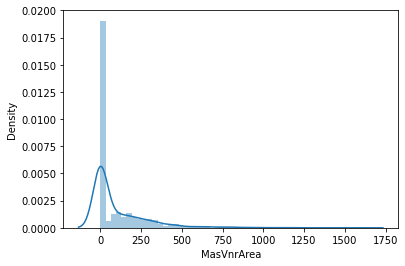

In [27]:
sns.distplot(df['MasVnrArea'])

<AxesSubplot:xlabel='MasVnrArea'>

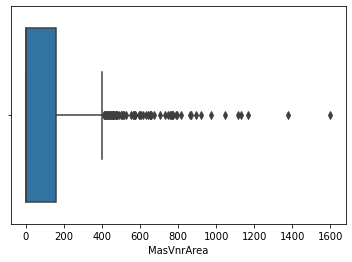

In [28]:
sns.boxplot(df['MasVnrArea'])

A lot of outliers are present, we have to treat this latter

I shall now fill up the missing values in this column using the most frequently apperaing value 


In [29]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

In [30]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [31]:
pd.set_option('display.max_columns', 100)

In [32]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [33]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,4.221150,10484.749144,6.104452,5.595890,1970.930651,1984.758562,101.696918,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,41.940650,0.308522,8957.442311,1.390153,1.124343,30.145255,20.785185,182.218483,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,20.000000,3.091042,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,4.110874,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,50.000000,4.221150,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,70.000000,4.385132,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,5.749393,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

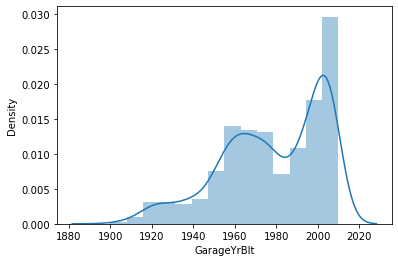

In [34]:
sns.distplot(df['GarageYrBlt'])

We can again replace the missing values in this column by the mode of the column

In [35]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode(), inplace=True)

In [36]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.457773,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.028215,-0.052236,-0.062403,-0.134170,-0.214042,-0.227927,0.300366,0.053737,0.086448,0.004556,0.008207,0.140807,0.168423,-0.013283,0.283506,0.051179,-0.035792,0.077630,-0.027639,-0.092408,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.457773,1.000000,0.283674,0.197211,-0.023220,0.080167,0.065694,0.148984,0.171788,0.006163,0.138033,0.322237,0.382590,0.062037,0.001759,0.335241,0.066736,0.005092,0.157768,0.011854,0.272006,0.022143,0.323811,0.213079,0.033645,0.264316,0.317286,0.101832,0.132718,0.026197,0.052942,0.045073,0.120683,0.003669,0.032614,-0.007770,0.326450
LotArea,-0.124151,0.283674,1.000000,0.107188,0.017513,0.005506,0.027228,0.120192,0.221851,0.056656,0.006600,0.259733,0.312843,0.059803,-0.001915,0.281360,0.142387,0.059282,0.123197,0.007271,0.117351,-0.013075,0.184546,0.285983,-0.034981,0.158313,0.195162,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,0.070462,0.197211,0.107188,1.000000,-0.083167,0.575800,0.555945,0.403985,0.219643,-0.040893,0.308676,0.528285,0.458758,0.316624,-0.039295,0.599700,0.101732,-0.030702,0.548824,0.296134,0.099639,-0.178220,0.432579,0.390067,0.541719,0.596322,0.566782,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,-0.056978,-0.023220,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.135133,-0.028810,0.044336,-0.146384,-0.162481,-0.134420,0.036668,0.041877,-0.065006,-0.039680,0.091016,-0.171931,-0.052125,0.028393,-0.076047,-0.039952,-0.013632,-0.318278,-0.161996,-0.126021,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,0.023988,0.080167,0.005506,0.575800,-0.377731,1.000000,0.592829,0.318562,0.227933,-0.027682,0.155559,0.386265,0.279450,0.011834,-0.189044,0.198644,0.164983,-0.028161,0.471264,0.243227,-0.080639,-0.167869,0.095476,0.134313,0.826366,0.525346,0.473216,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,0.056618,0.065694,0.027228,0.555945,0.080669,0.592829,1.000000,0.178583,0.114430,-0.044694,0.174732,0.280720,0.233384,0.155102,-0.072526,0.295048,0.104643,-0.011375,0.444446,0.194943,-0.035847,-0.139943,0.206923,0.118378,0.639153,0.428325,0.387744,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,0.028215,0.148984,0.120192,0.403985,-0.135133,0.318562,0.178583,1.000000,0.263377,-0.064685,0.108974,0.362330,0.334512,0.172136,-0.070026,0.384386,0.084498,0.014974,0.264357,0.197831,0.091339,-0.039438,0.277737,0.241040,0.250109,0.340100,0.363537,0.152083,0.127876,-0.102142,0.019123,0.047375,0.013836,-0.027263,0.012707,-0.013220,0.460535
BsmtFinSF1,-0.052236,0.171788,0.221851,0.219643,-0.028810,0.227933,0.114430,0.263377,1.000000,-0.052145,-0.499861,0.518940,0.445876,-0.127656,-0.070932,0.217160,0.645126,0.063895,0.054511,0.015767,-0.114888,-0.065450,0.043499,0.257482,0.135558,0.197529,0.286290,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.007482,0.005614,0.362874
BsmtFinSF2,-0.062403,0.006163,0.056656,-0.040893,0.044336,-0.027682,-0.044694,-0.064685,-0.052145,1.000000,-0.213580,0.098167,0.093442,-0.092049,-0.000577,-0.007484,0.163518,0.093692,-0.060773,-0.023734,-0.005788,-0.034411,-0.033702,0.047945,-0.071691,-0.020806,-0.002051,0.094690,-0.014103,0.032081,-0.031263,0.076561,0.045990,0.007915,-0.014605,0.038438,-0.010151


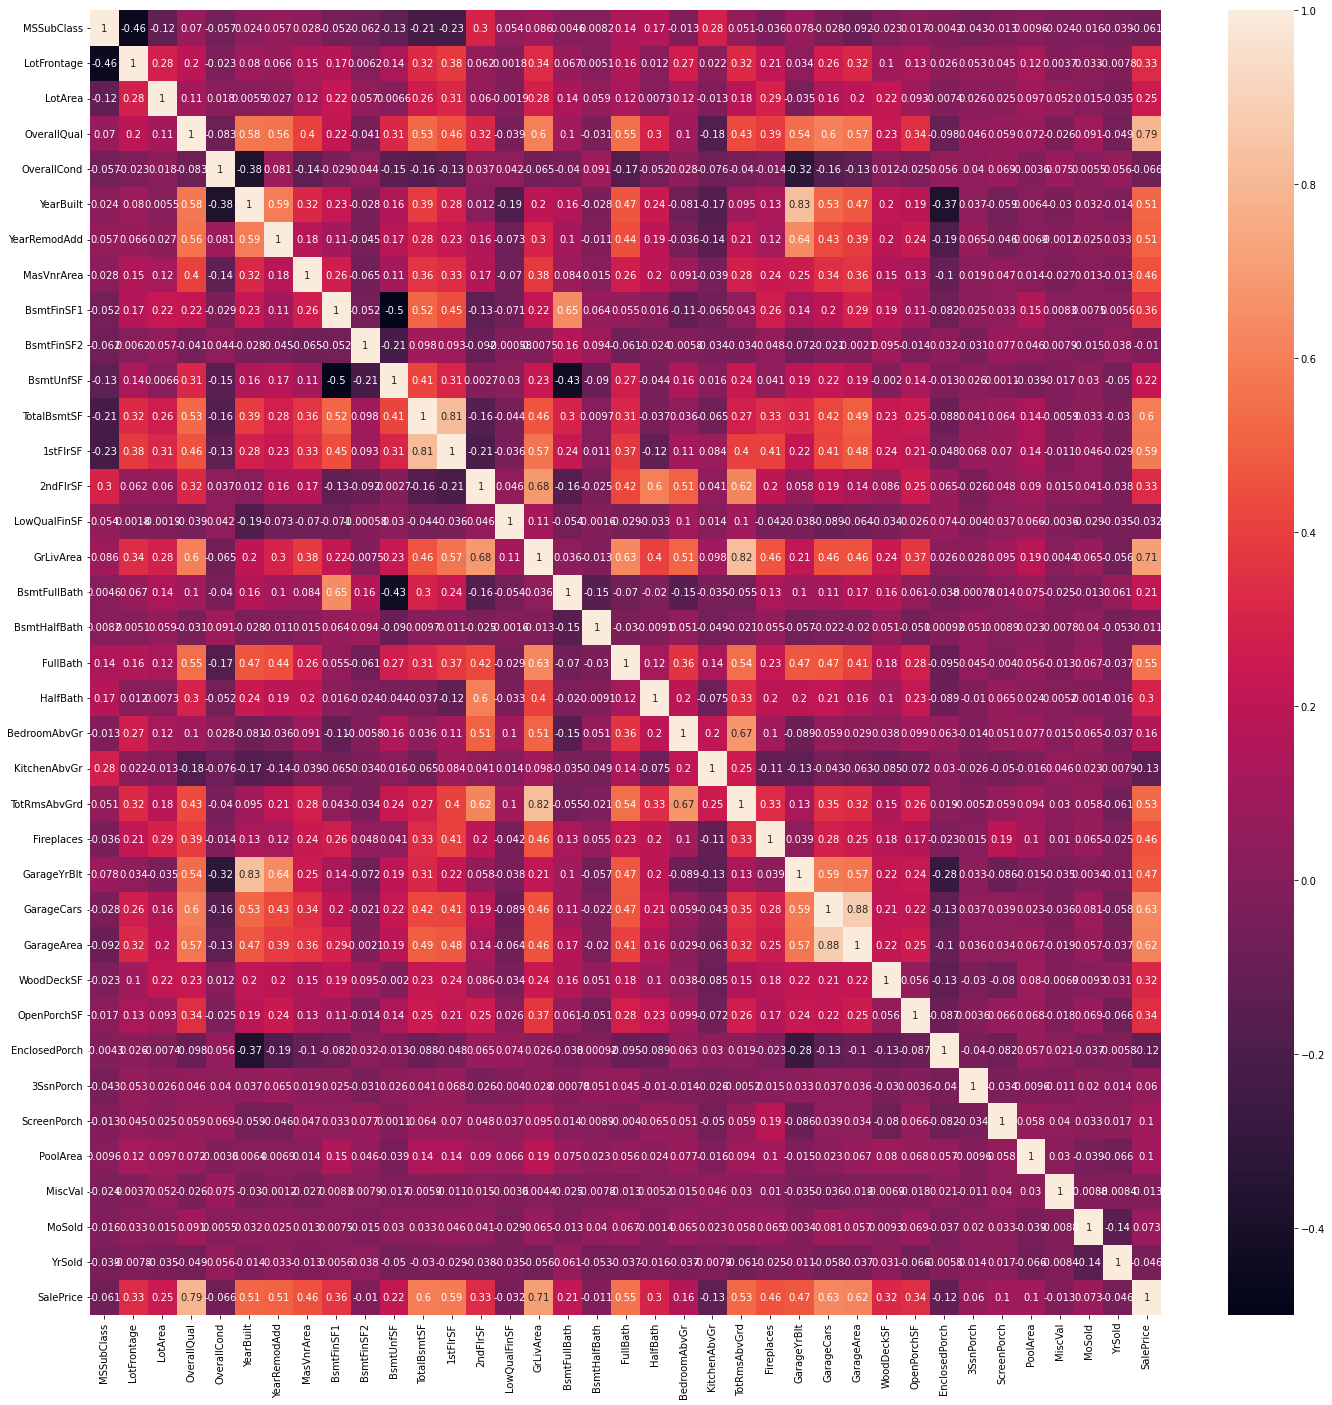

In [38]:
corr_hmap=df.corr()

plt.figure(figsize=(24,24))
sns.heatmap(corr_hmap,annot=True)
plt.show()

A lot of correlations seems to be present, let us check

In [39]:
# Let us find out which feature has high correlation(>0.7)

for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

1stFlrSF
TotRmsAbvGrd
GarageYrBlt
GarageArea
SalePrice
SalePrice


I shall treat the multi correlation after checking with VIF

Before that I shall
1. transform the categorical columns into numerical ones by using label encoder
2. Treat the skewness & outliers

In [40]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,4.221150,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,20,RL,4.564348,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,60,RL,4.532599,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,20,RL,4.663439,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,20,RL,4.221150,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [43]:
columns=['MSZoning', 'Street','Alley','LotShape','LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
         'Condition1','Condition1','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
         'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'Heating', 'HeatingQC','CentralAir','Electrical', 'KitchenQual','Functional', 'FireplaceQu',
         'GarageType', 'GarageFinish','GarageQual','GarageCond','PavedDrive', 'PoolQC','Fence', 'MiscFeature','SaleType'
        ,'SaleCondition']

for i in columns:
    print("column_name:",  i,'\n', df[i].value_counts(),'\n')

column_name: MSZoning 
 RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64 

column_name: Street 
 Pave    1164
Grvl       4
Name: Street, dtype: int64 

column_name: Alley 
 Grvl    41
Pave    36
Name: Alley, dtype: int64 

column_name: LotShape 
 Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64 

column_name: LandContour 
 Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64 

column_name: Utilities 
 AllPub    1168
Name: Utilities, dtype: int64 

column_name: LotConfig 
 Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64 

column_name: LandSlope 
 Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64 

column_name: Neighborhood 
 NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge  

In [46]:
for i in columns:
    print(i,'\n', df[i].isnull().sum())

MSZoning 
 0
Street 
 0
Alley 
 1091
LotShape 
 0
LandContour 
 0
Utilities 
 0
LotConfig 
 0
LandSlope 
 0
Neighborhood 
 0
Condition1 
 0
Condition1 
 0
BldgType 
 0
HouseStyle 
 0
RoofStyle 
 0
RoofMatl 
 0
Exterior1st 
 0
Exterior2nd 
 0
MasVnrType 
 7
ExterQual 
 0
ExterCond 
 0
Foundation 
 0
BsmtQual 
 30
BsmtCond 
 30
BsmtExposure 
 31
BsmtFinType1 
 30
BsmtFinType2 
 31
Heating 
 0
HeatingQC 
 0
CentralAir 
 0
Electrical 
 0
KitchenQual 
 0
Functional 
 0
FireplaceQu 
 551
GarageType 
 64
GarageFinish 
 64
GarageQual 
 64
GarageCond 
 64
PavedDrive 
 0
PoolQC 
 1161
Fence 
 931
MiscFeature 
 1124
SaleType 
 0
SaleCondition 
 0


<AxesSubplot:xlabel='Alley', ylabel='count'>

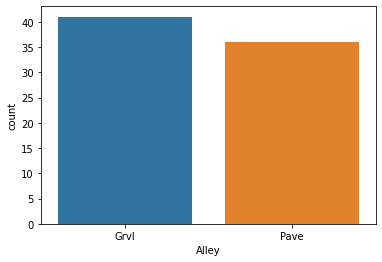

In [48]:
sns.countplot(df['Alley'])

Alley ha sonly a small number of values present, most of the values are missing, let us drop this column

In [52]:
df.drop(columns=['Alley'], inplace=True)

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

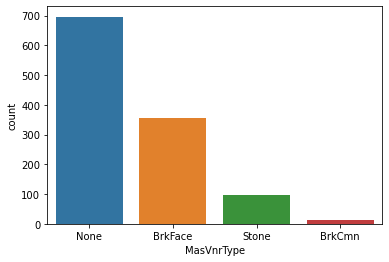

In [53]:
sns.countplot(df['MasVnrType'])

In [54]:
# let us fill up the missing values here by NA

df['MasVnrType'].fillna(value='NA',inplace=True)

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

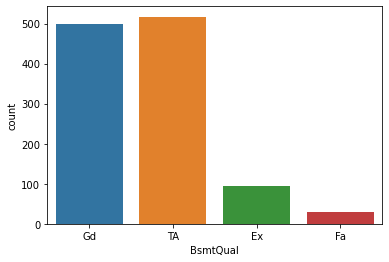

In [55]:
sns.countplot(df['BsmtQual'])

In [56]:
# let us fill up the missing values here by NA

df['BsmtQual'].fillna(value='NA',inplace=True)

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

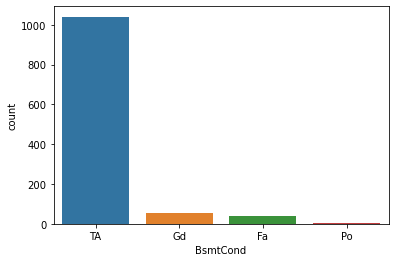

In [57]:
sns.countplot(df['BsmtCond'])

In [58]:
df['BsmtCond'].fillna(value='NA',inplace=True)

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

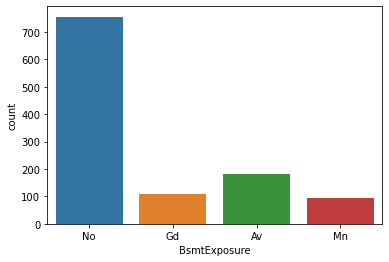

In [59]:
sns.countplot(df['BsmtExposure'])

In [60]:
df['BsmtExposure'].fillna(value='NA',inplace=True)

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

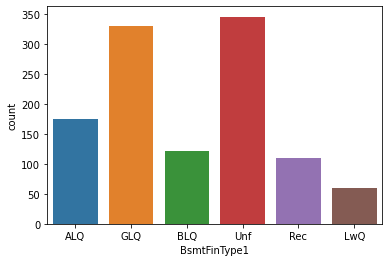

In [61]:
sns.countplot(df['BsmtFinType1'])

In [62]:
df['BsmtFinType1'].fillna(value='NA',inplace=True)

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

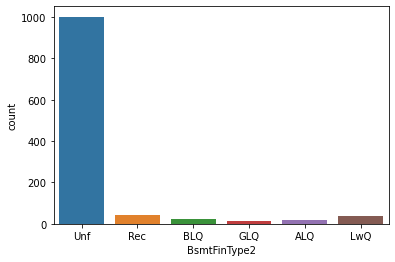

In [63]:
sns.countplot(df['BsmtFinType2'])

In [64]:
df['BsmtFinType2'].fillna(value='NA',inplace=True)

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

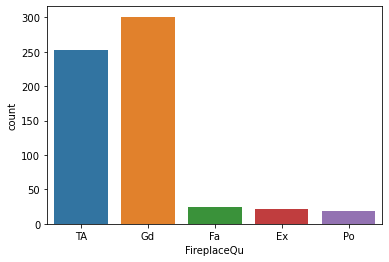

In [65]:
sns.countplot(df['FireplaceQu'])

In [66]:
df['FireplaceQu'].fillna(value='NA',inplace=True)

<AxesSubplot:xlabel='GarageType', ylabel='count'>

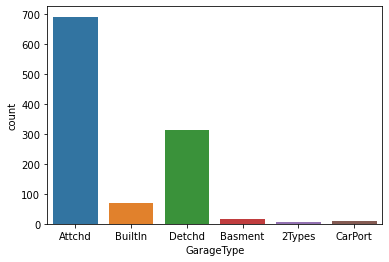

In [67]:
sns.countplot(df['GarageType'])

In [68]:
df['GarageType'].fillna(value='NA',inplace=True)

<AxesSubplot:xlabel='GarageFinish', ylabel='count'>

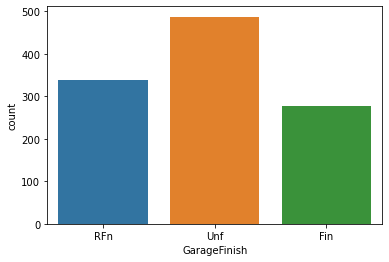

In [69]:
sns.countplot(df['GarageFinish'])

In [70]:
df['GarageFinish'].fillna(value='NA',inplace=True)

<AxesSubplot:xlabel='GarageQual', ylabel='count'>

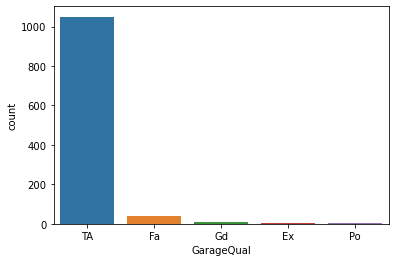

In [71]:
sns.countplot(df['GarageQual'])

In [72]:
df['GarageQual'].fillna(value='NA',inplace=True)

<AxesSubplot:xlabel='GarageCond', ylabel='count'>

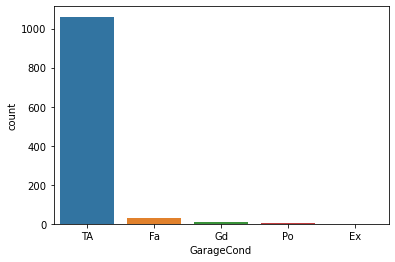

In [73]:
sns.countplot(df['GarageCond'])

GarageQual & GarageCond sre almost the same kind of data, we can keep any one of these

In [75]:
df.drop(columns=['GarageCond'], inplace=True)

I shall drop the column MiscFeature as it does not carry significant information & has mostly missing values

In [76]:
df.drop(columns=['MiscFeature'], inplace=True)

However the columns PoolQC and Fence, may carry important information & may impact the property price, so let us keep those

<AxesSubplot:xlabel='PoolQC', ylabel='count'>

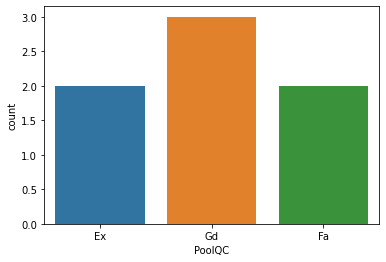

In [77]:
sns.countplot(df['PoolQC'])

In [78]:
df['PoolQC'].fillna(value='NA', inplace=True)

<AxesSubplot:xlabel='Fence', ylabel='count'>

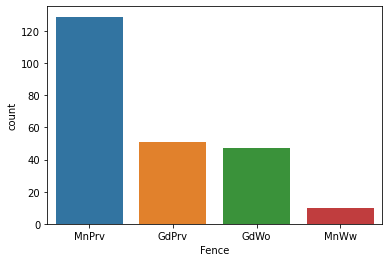

In [79]:
sns.countplot(df['Fence'])

In [80]:
df['Fence'].fillna(value='NA', inplace=True)

In [83]:
cols=df.columns

for i in cols:
    print(i, df[i].isnull().sum(),'\n')

MSSubClass 0 

MSZoning 0 

LotFrontage 0 

LotArea 0 

Street 0 

LotShape 0 

LandContour 0 

Utilities 0 

LotConfig 0 

LandSlope 0 

Neighborhood 0 

Condition1 0 

Condition2 0 

BldgType 0 

HouseStyle 0 

OverallQual 0 

OverallCond 0 

YearBuilt 0 

YearRemodAdd 0 

RoofStyle 0 

RoofMatl 0 

Exterior1st 0 

Exterior2nd 0 

MasVnrType 0 

MasVnrArea 0 

ExterQual 0 

ExterCond 0 

Foundation 0 

BsmtQual 0 

BsmtCond 0 

BsmtExposure 0 

BsmtFinType1 0 

BsmtFinSF1 0 

BsmtFinType2 0 

BsmtFinSF2 0 

BsmtUnfSF 0 

TotalBsmtSF 0 

Heating 0 

HeatingQC 0 

CentralAir 0 

Electrical 0 

1stFlrSF 0 

2ndFlrSF 0 

LowQualFinSF 0 

GrLivArea 0 

BsmtFullBath 0 

BsmtHalfBath 0 

FullBath 0 

HalfBath 0 

BedroomAbvGr 0 

KitchenAbvGr 0 

KitchenQual 0 

TotRmsAbvGrd 0 

Functional 0 

Fireplaces 0 

FireplaceQu 0 

GarageType 0 

GarageYrBlt 64 

GarageFinish 0 

GarageCars 0 

GarageArea 0 

GarageQual 0 

PavedDrive 0 

WoodDeckSF 0 

OpenPorchSF 0 

EnclosedPorch 0 

3SsnPorch 0

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

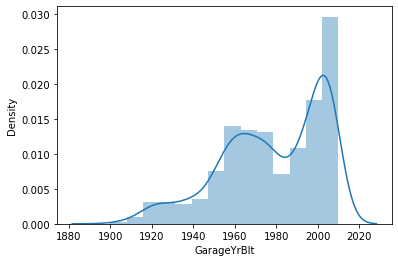

In [86]:
sns.distplot(df['GarageYrBlt'])

In [85]:
df['GarageYrBlt'].value_counts()

2006.0    52
2005.0    51
2007.0    40
2003.0    37
2004.0    36
          ..
1900.0     1
1927.0     1
1908.0     1
1933.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [90]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace=True)

In [91]:
df['GarageYrBlt'].isnull().sum()

0

Now all the missing values are imputed

In [92]:
df.shape

(1168, 77)

In [97]:
df['Condition2'].isnull().sum()

0

In [98]:
#Let us now use the label encoder to transform categorical features

columns=['MSZoning', 'Street','LotShape','LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
         'Condition1','Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
         'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'Heating', 'HeatingQC','CentralAir','Electrical', 'KitchenQual','Functional', 'FireplaceQu',
         'GarageType', 'GarageFinish','GarageQual','PavedDrive', 'PoolQC','Fence', 'SaleType'
        ,'SaleCondition']


from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in columns:
    df[i]=le.fit_transform(df[i])

In [99]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,4.221150,4928,1,0,3,0,4,0,13,2,2,4,2,6,5,1976,1976,1,1,8,9,3,0.0,3,4,1,2,4,4,0,120,6,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,5,1,1977.0,2,2,440,5,2,0,205,0,0,0,0,3,4,0,2,2007,8,4,128000
1,20,3,4.564348,15865,1,0,3,0,4,1,12,2,2,0,2,8,6,1970,1970,0,5,12,13,3,0.0,2,2,2,4,1,1,0,351,5,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,2,8,6,1,5,1,1970.0,3,2,621,5,2,81,207,0,0,224,0,3,4,0,10,2007,8,4,268000
2,60,3,4.532599,9920,1,0,3,0,1,0,15,2,2,0,5,7,5,1996,1997,1,1,7,7,3,0.0,2,4,2,2,4,0,2,862,6,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,5,1,1997.0,3,2,455,5,2,180,130,0,0,0,0,3,4,0,6,2007,8,4,269790
3,20,3,4.663439,11751,1,0,3,0,4,0,14,2,2,0,2,6,6,1977,1977,3,1,8,9,1,480.0,3,4,1,2,4,4,1,705,6,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,3,7,6,1,5,1,1977.0,2,2,546,5,2,0,122,0,0,0,0,3,2,0,1,2010,0,4,190000
4,20,3,4.221150,16635,1,0,3,0,2,0,14,2,2,0,2,6,7,1977,2000,1,1,4,4,4,126.0,2,4,1,2,4,4,0,1246,6,0,356,1602,1,2,1,4,1602,0,0,1602,0,1,2,0,3,1,2,8,6,1,5,1,1977.0,0,2,529,5,2,240,0,0,0,0,0,3,4,0,6,2009,8,4,215000


In [101]:
cols=df.columns
cols

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF

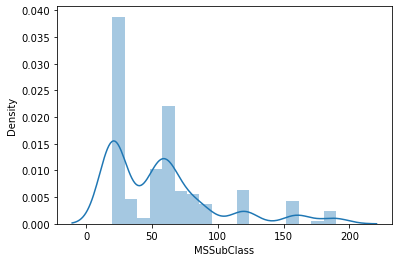

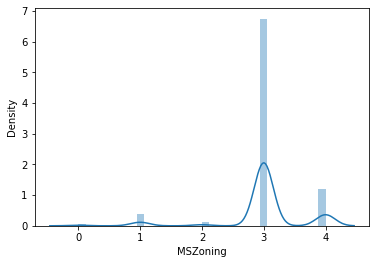

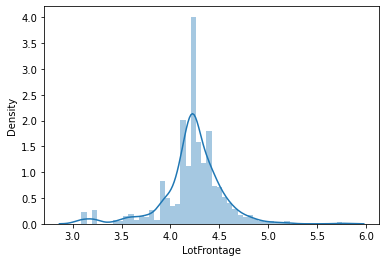

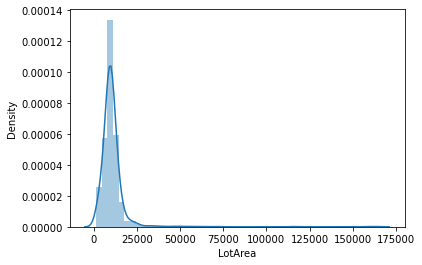

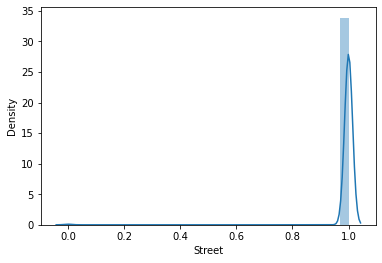

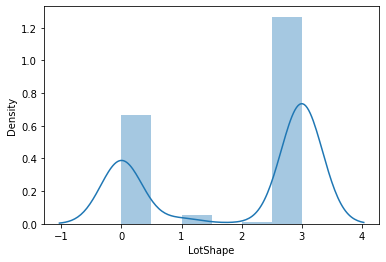

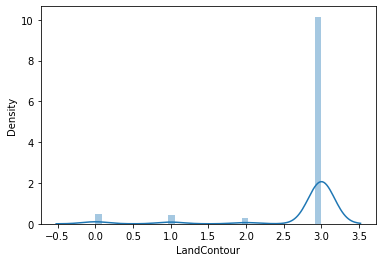

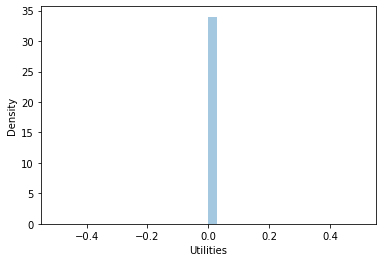

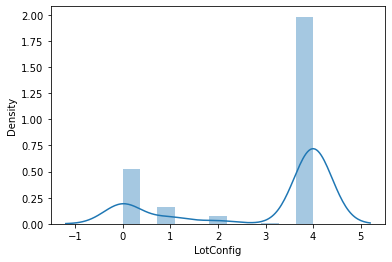

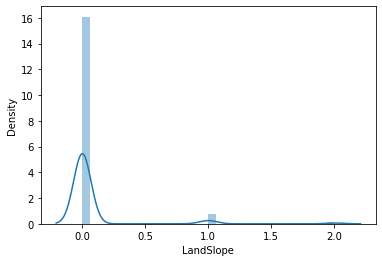

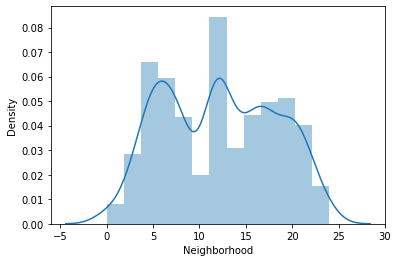

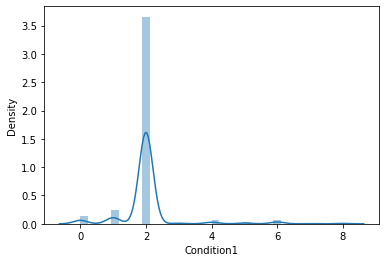

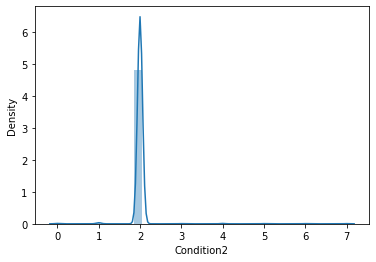

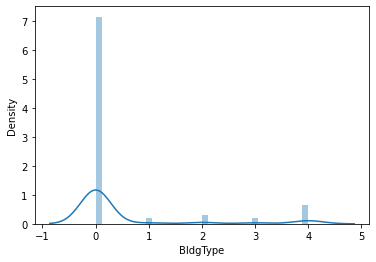

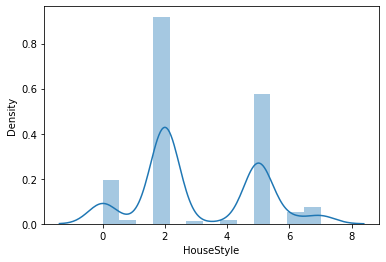

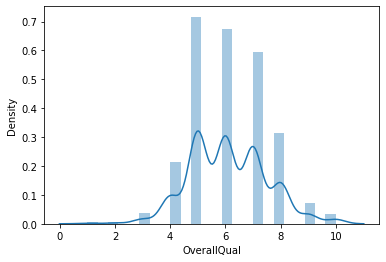

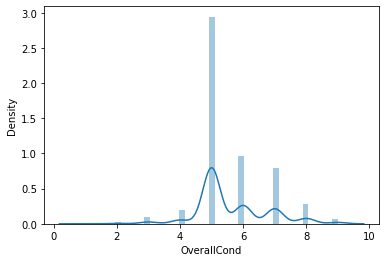

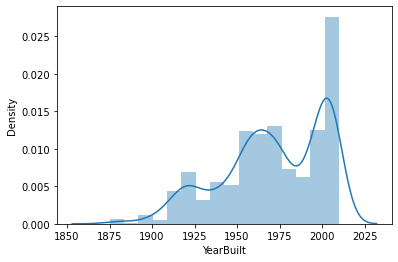

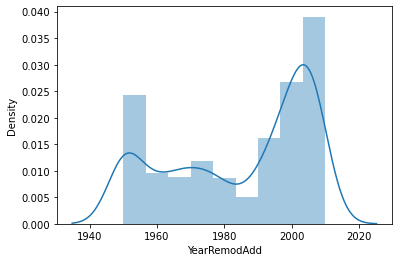

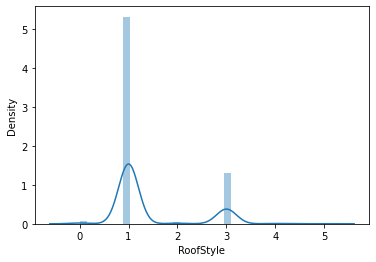

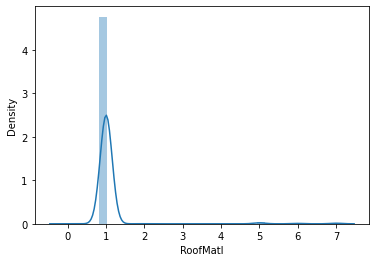

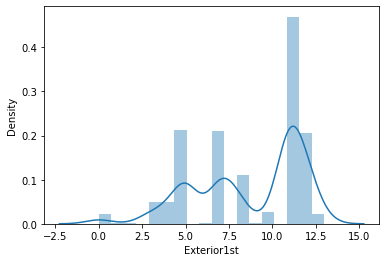

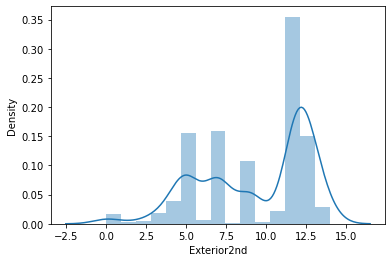

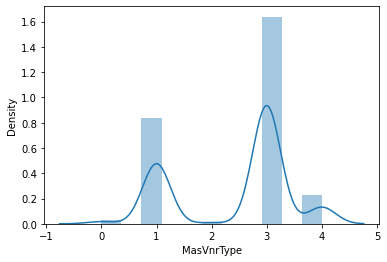

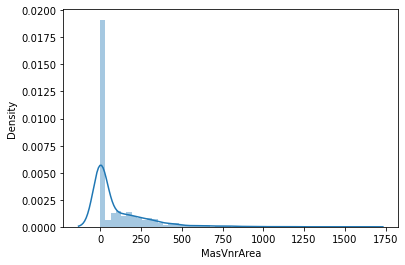

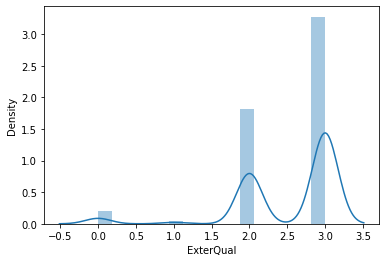

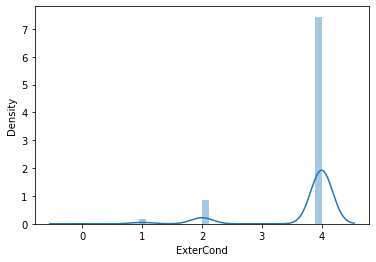

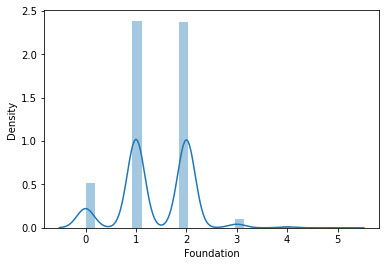

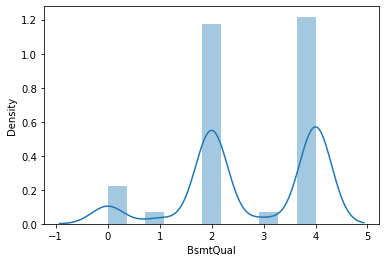

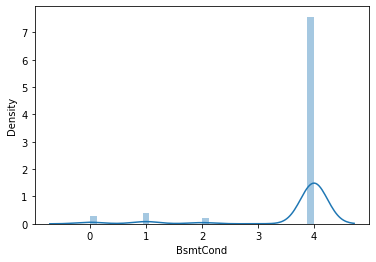

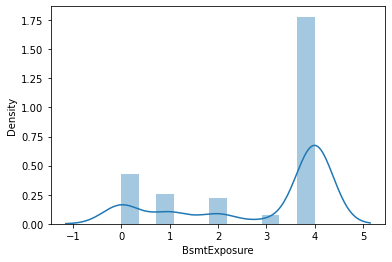

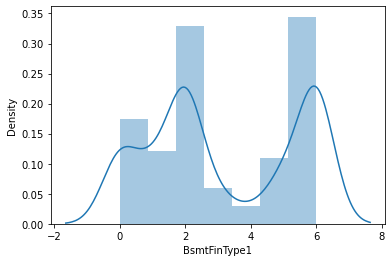

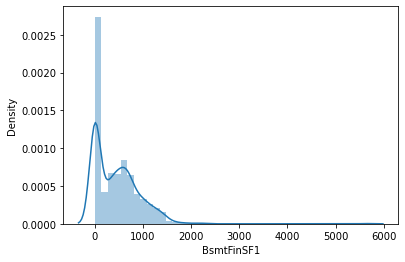

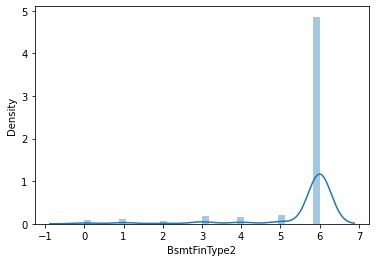

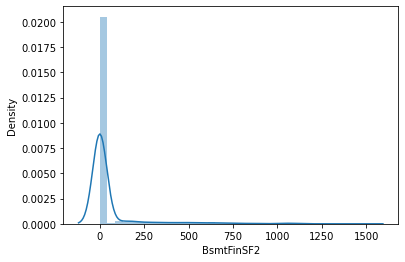

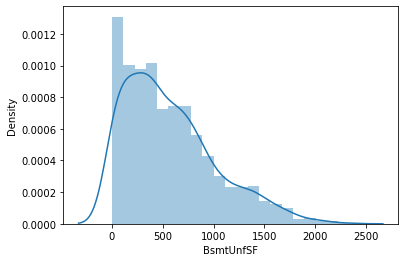

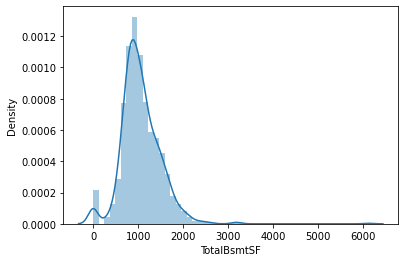

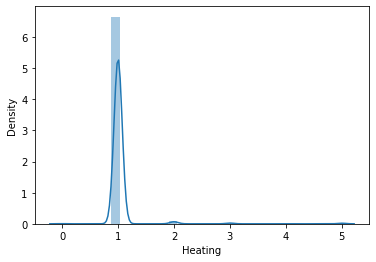

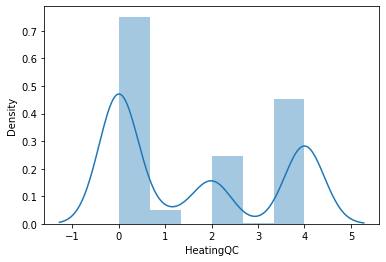

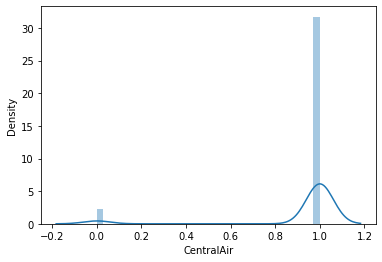

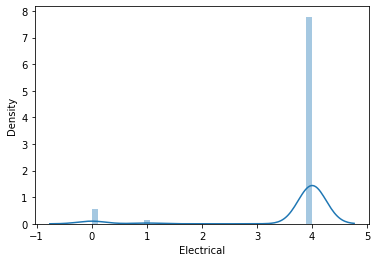

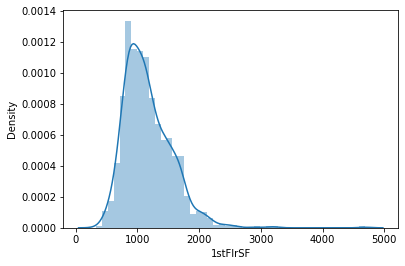

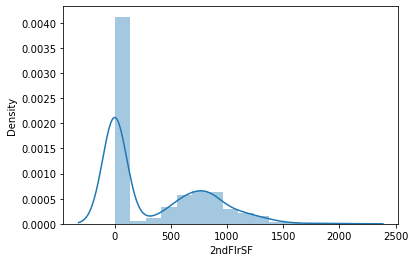

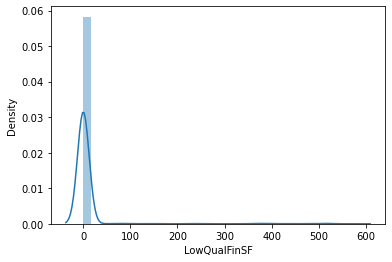

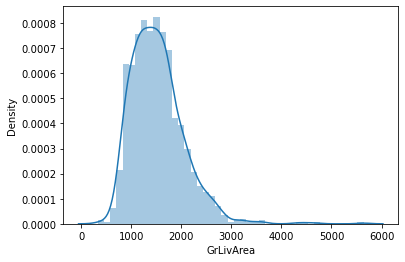

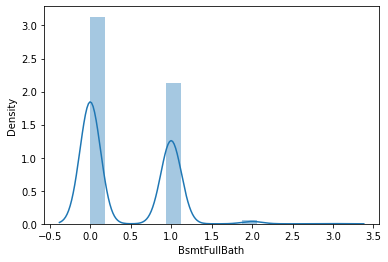

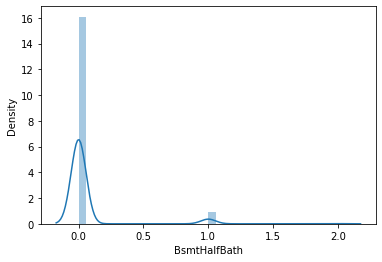

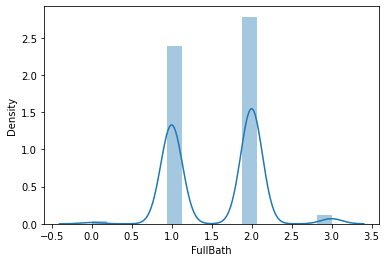

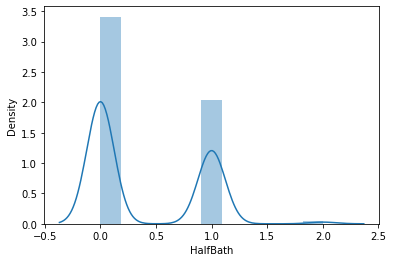

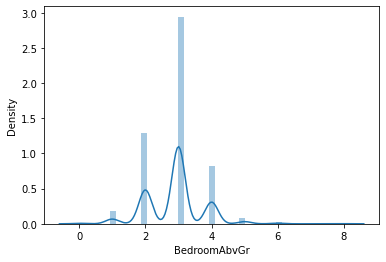

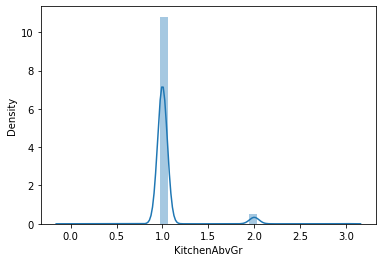

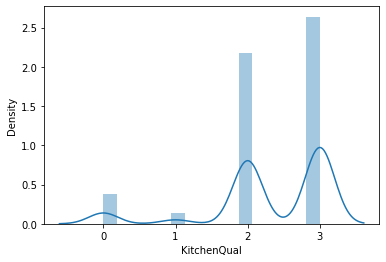

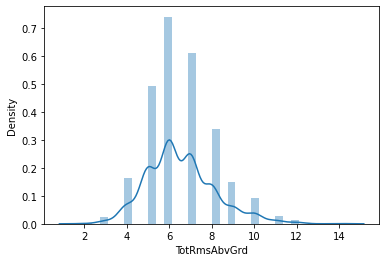

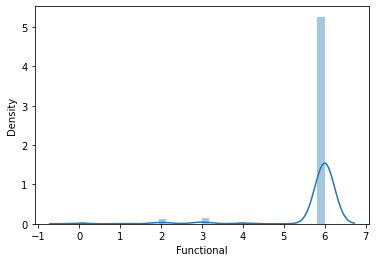

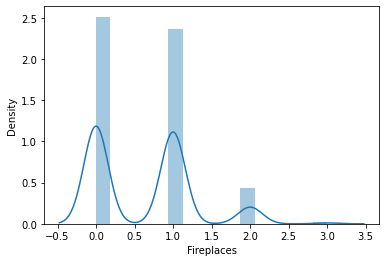

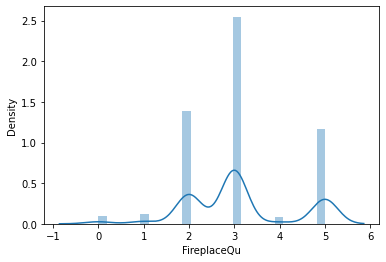

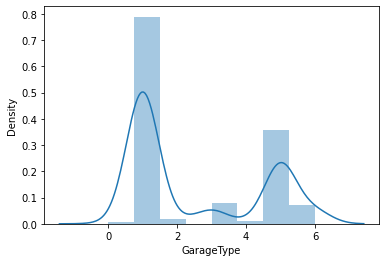

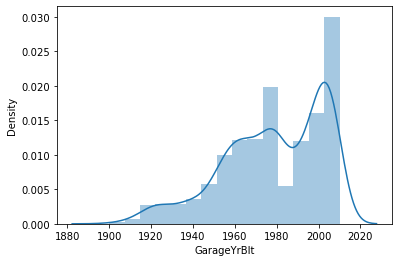

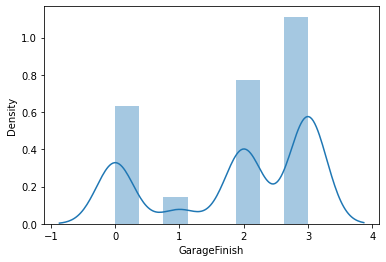

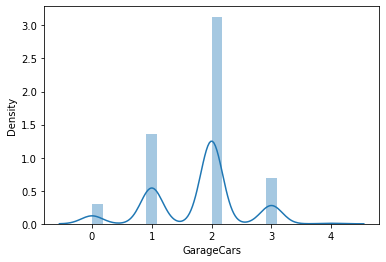

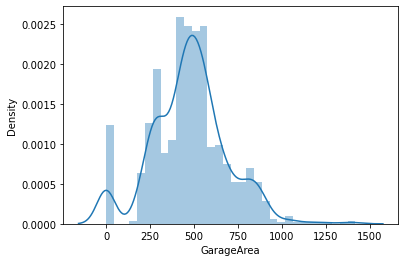

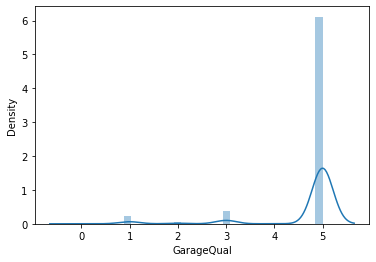

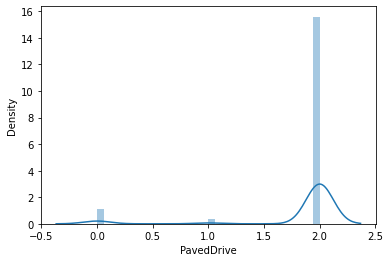

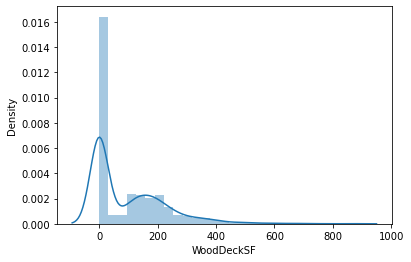

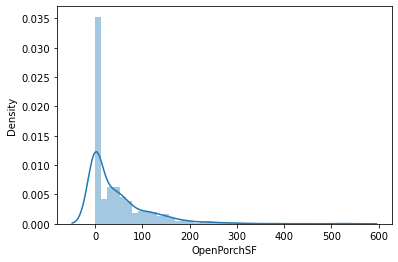

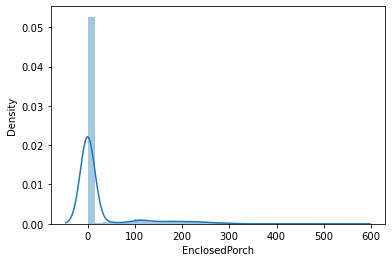

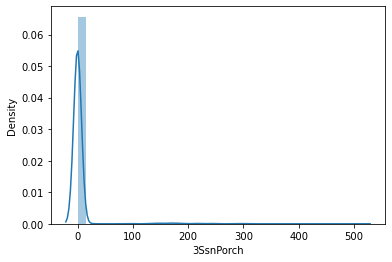

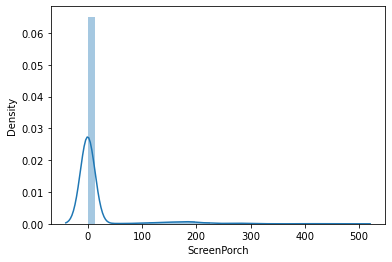

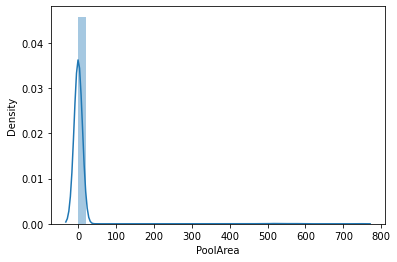

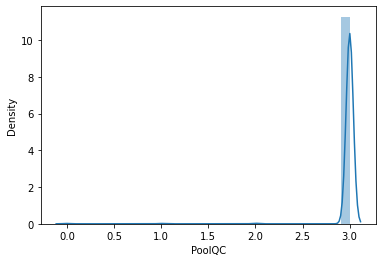

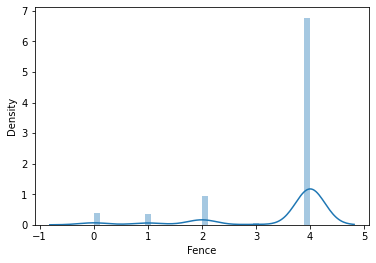

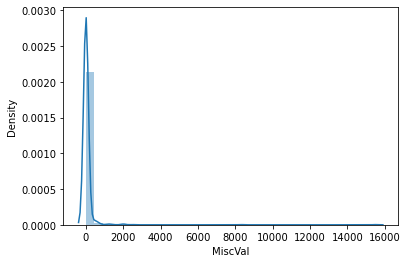

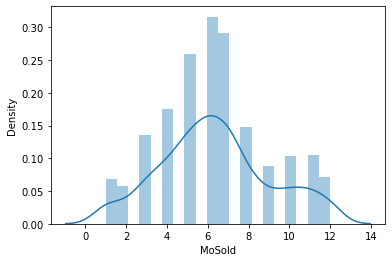

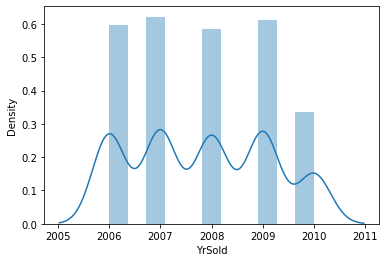

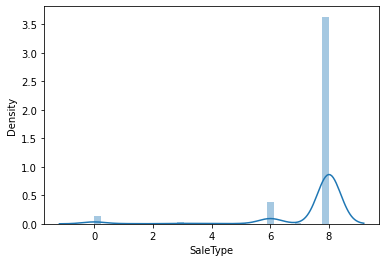

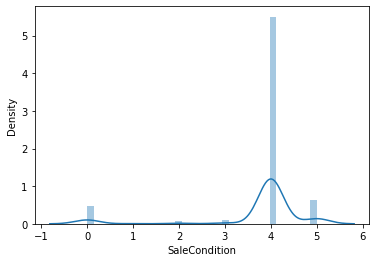

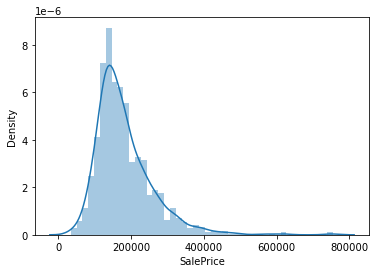

In [102]:
for i in cols:
    sns.distplot(df[i])
    plt.show()

In [103]:
df.skew()

MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage      -0.723329
LotArea          10.659285
Street          -17.021969
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
Length: 77, dtype: float64

In [104]:
from sklearn.preprocessing import power_transform

for i in cols:
    if df.skew().loc[i]>0.5:
        df[i]=power_transform(df[i].to_numpy().reshape(-1, 1))

In [105]:
for i in cols:
    print(i, df[i].skew(),'\n')

MSSubClass 0.06400705160539474 

MSZoning -1.7967850975188662 

LotFrontage -0.7233294238148051 

LotArea 0.032508958395610514 

Street -17.021969279861406 

LotShape -0.6037752483890678 

LandContour -3.125981609220846 

Utilities 0 

LotConfig -1.118821122735627 

LandSlope 3.954345429885629 

Neighborhood 0.043735292946020986 

Condition1 0.2254676624067892 

Condition2 0.5372767379993716 

BldgType 1.857193782248079 

HouseStyle 0.2856801863402313 

OverallQual 0.1750824992845271 

OverallCond 0.04806320733836984 

YearBuilt -0.5792035025736898 

YearRemodAdd -0.49586353822203716 

RoofStyle -0.292233459970912 

RoofMatl -6.314986624321029 

Exterior1st -0.6128162942734297 

Exterior2nd -0.5923490009398771 

MasVnrType -0.5642941146502877 

MasVnrArea 0.4395255589475427 

ExterQual -1.8108426693880766 

ExterCond -2.5162186426386888 

Foundation -0.0027614041954660954 

BsmtQual -0.48752959452809685 

BsmtCond -2.8164435006410864 

BsmtExposure -0.9605650553923535 

BsmtFinType1 0.

In [106]:
for i in cols:
    if df.skew().loc[i]>0.5 or df.skew().loc[i]<-0.5:
        df[i]=np.log1p(df[i])

In [107]:
for i in cols:
    print(i, df[i].skew(),'\n')

MSSubClass 0.06400705160539474 

MSZoning -3.4877575608419153 

LotFrontage -1.1794905472225092 

LotArea 0.032508958395610514 

Street -17.021969279861402 

LotShape -0.6380476003905505 

LandContour -3.5228464883028825 

Utilities 0 

LotConfig -1.2605104942826708 

LandSlope 3.9543454298856244 

Neighborhood 0.043735292946020986 

Condition1 0.2254676624067892 

Condition2 14.32472771414786 

BldgType 1.8564224519014532 

HouseStyle 0.2856801863402313 

OverallQual 0.1750824992845271 

OverallCond 0.04806320733836984 

YearBuilt -0.6062449761958256 

YearRemodAdd -0.49586353822203716 

RoofStyle -0.292233459970912 

RoofMatl 6.9372790256118275 

Exterior1st -2.223725850189879 

Exterior2nd -2.1194036020204723 

MasVnrType -0.8841950745967491 

MasVnrArea 0.4395255589475427 

ExterQual -3.078206472935132 

ExterCond -3.001020802346327 

Foundation -0.0027614041954660954 

BsmtQual -0.48752959452809685 

BsmtCond -3.2697373966721828 

BsmtExposure -1.2586496402978549 

BsmtFinType1 0.

large skewness still present in many columns, I shall try to remove the outliers & check again

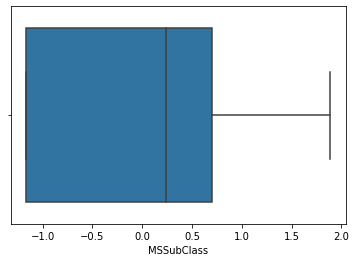

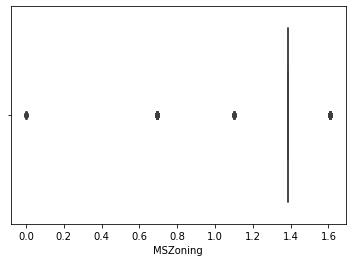

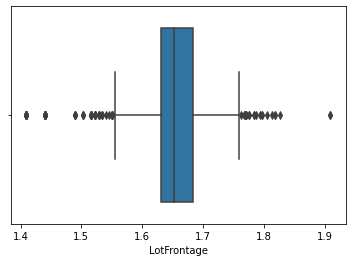

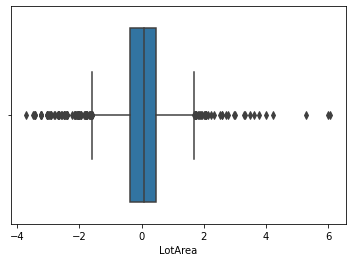

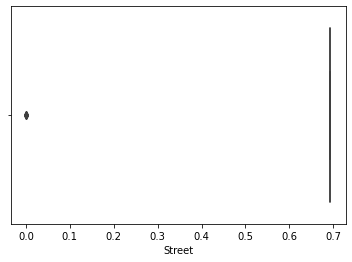

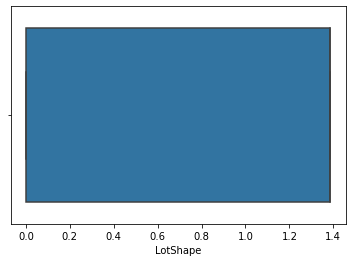

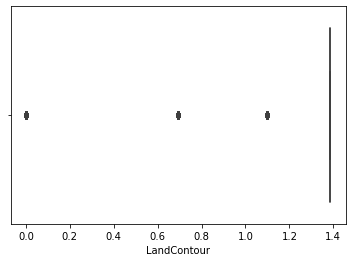

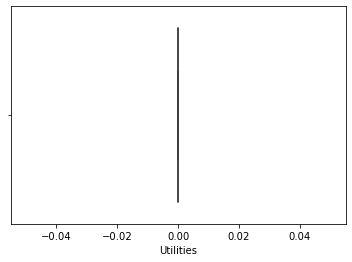

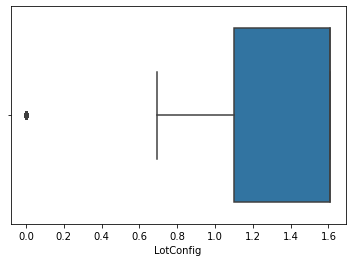

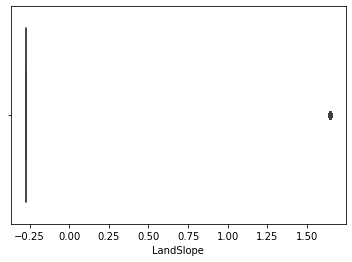

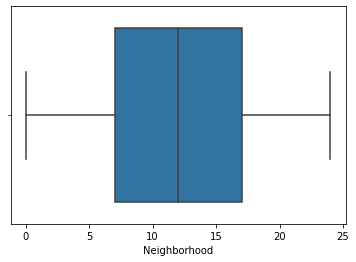

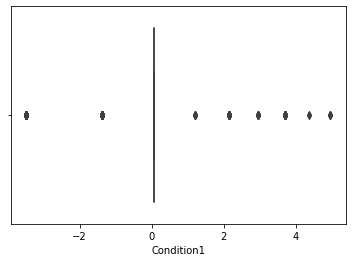

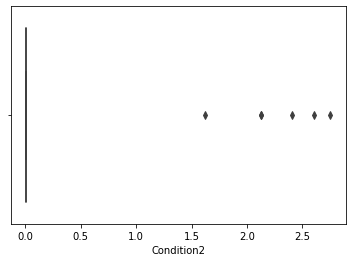

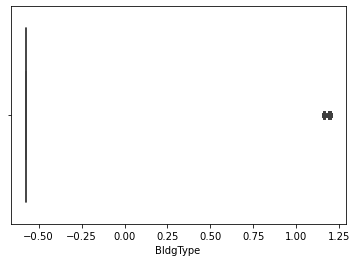

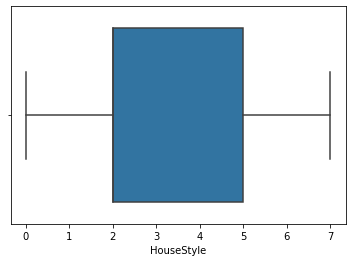

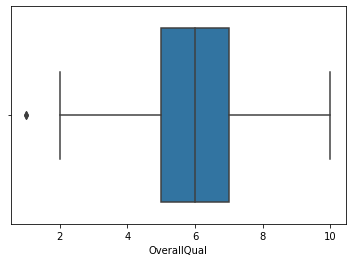

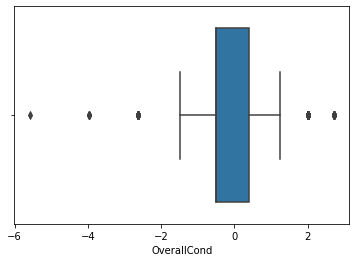

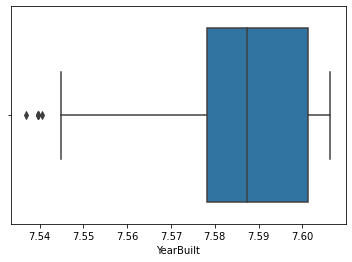

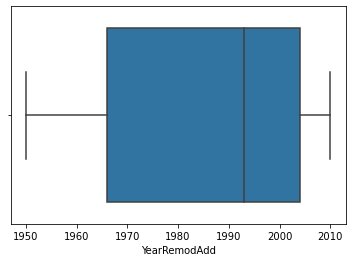

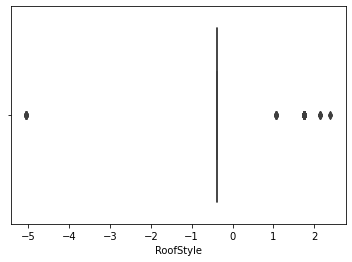

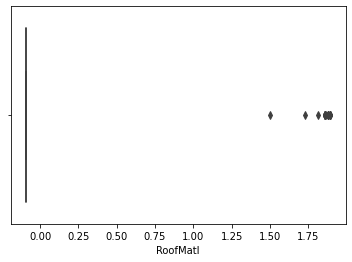

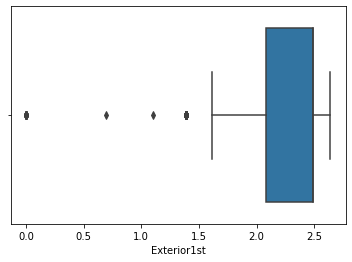

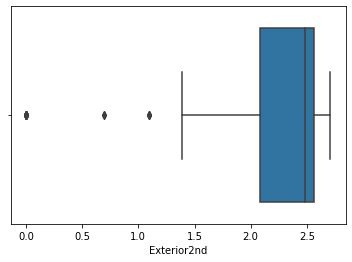

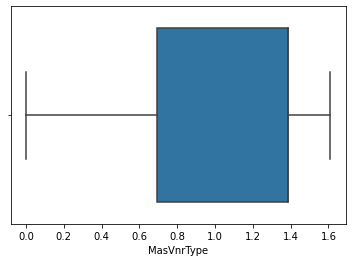

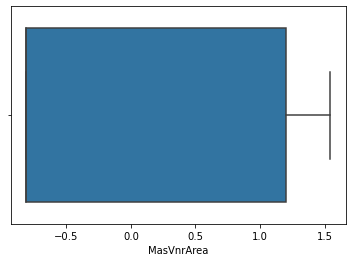

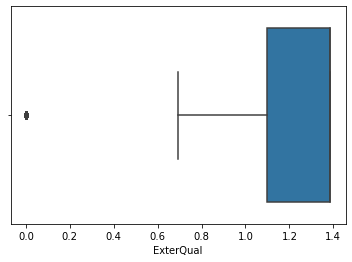

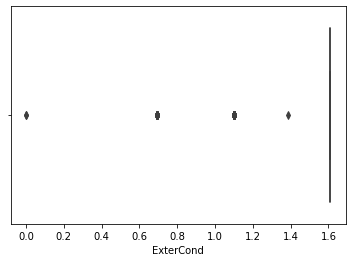

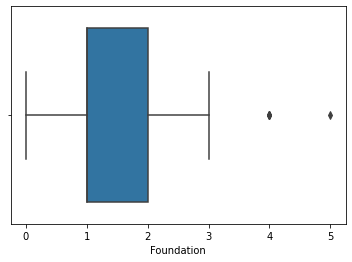

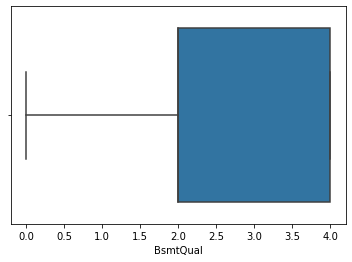

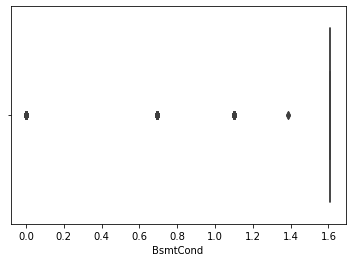

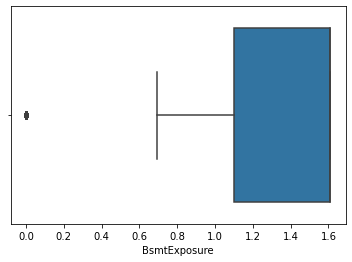

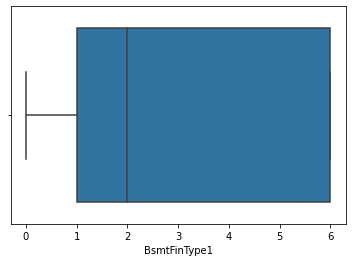

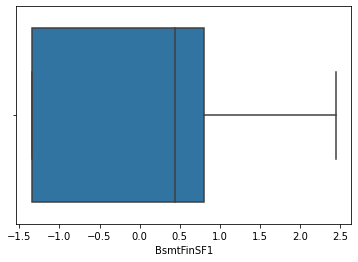

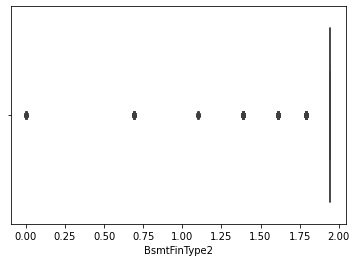

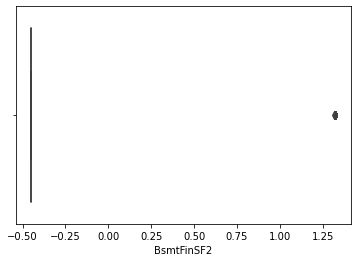

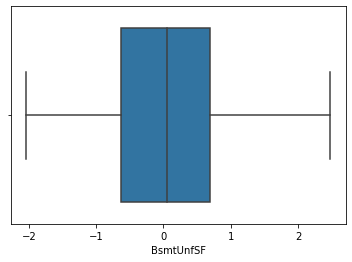

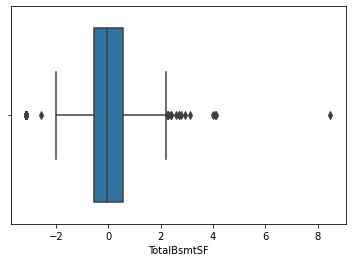

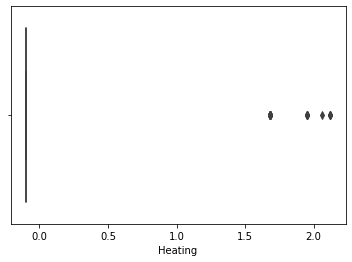

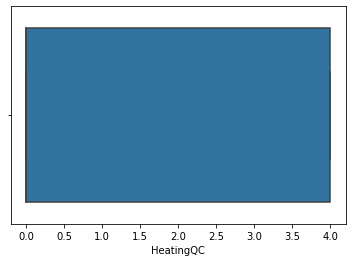

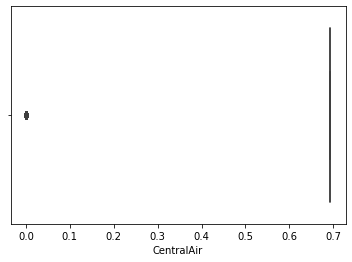

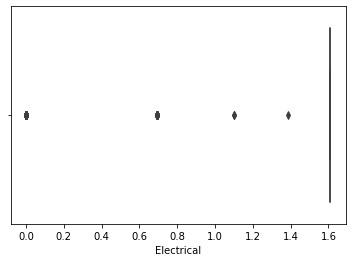

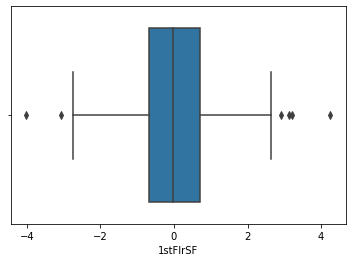

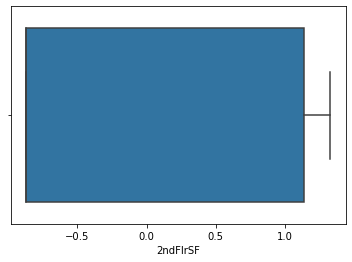

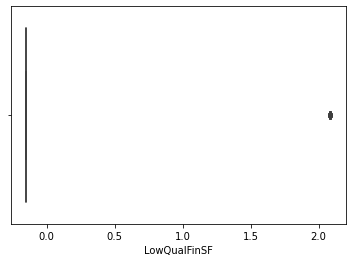

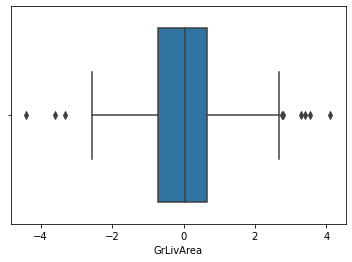

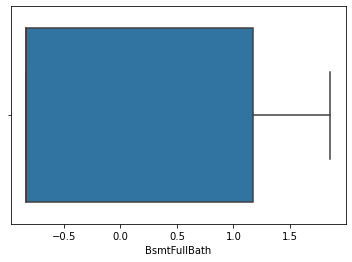

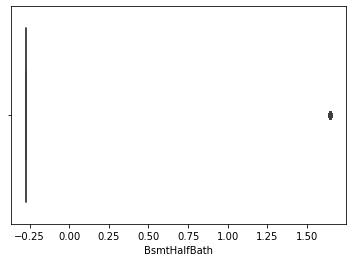

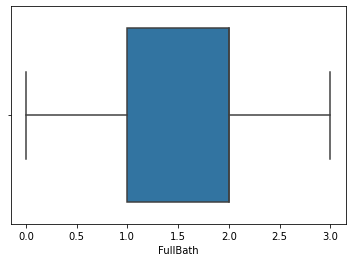

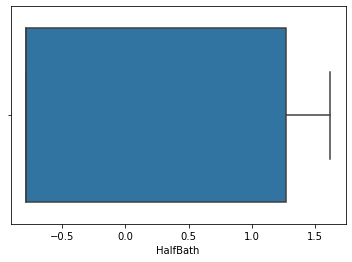

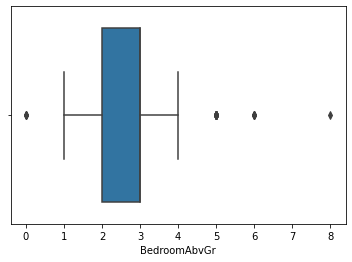

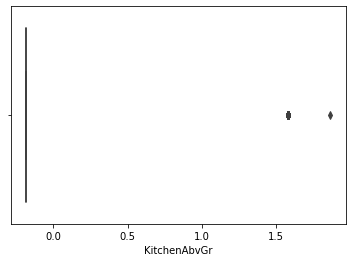

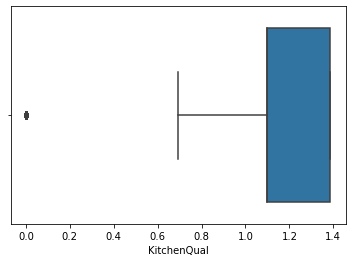

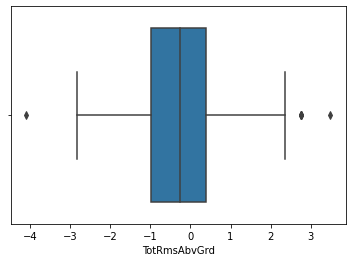

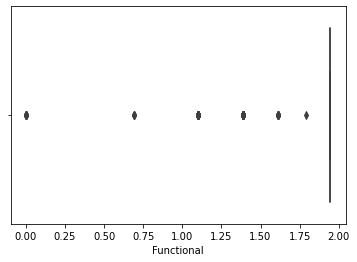

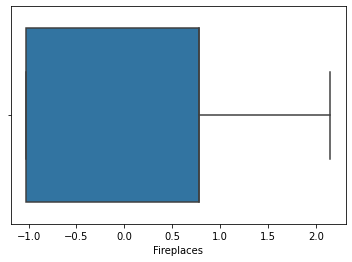

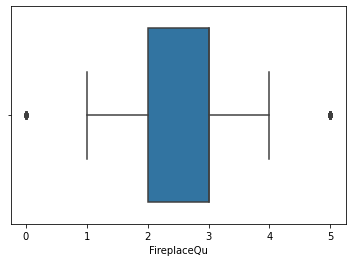

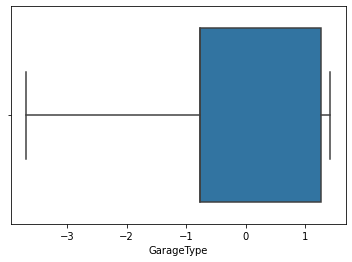

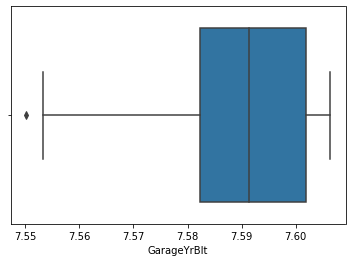

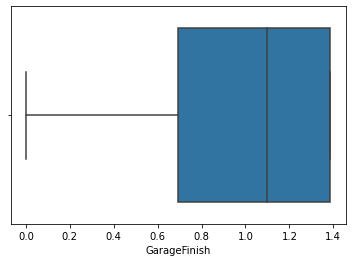

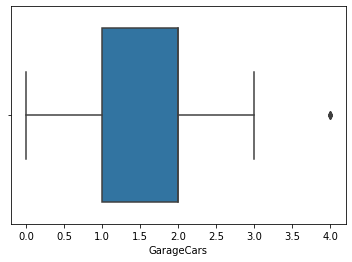

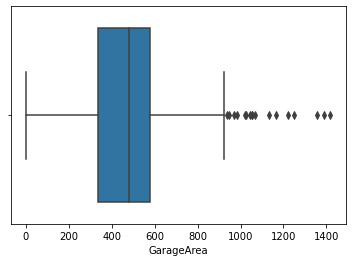

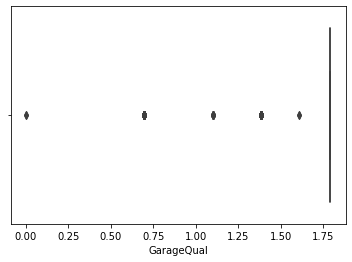

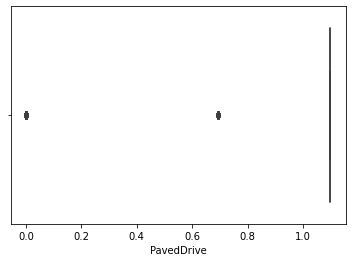

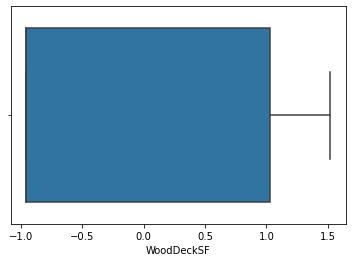

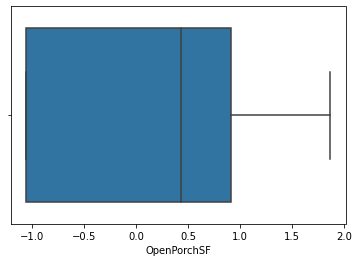

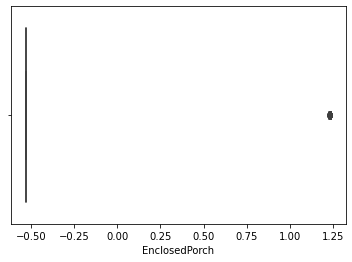

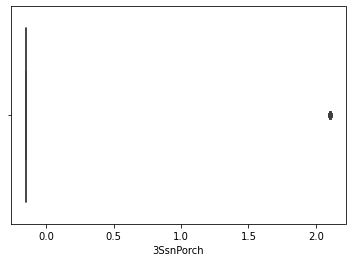

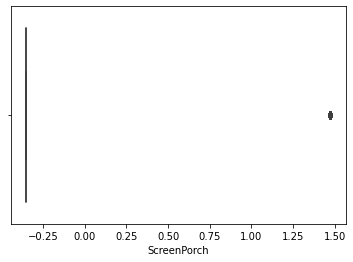

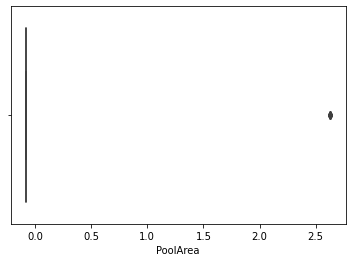

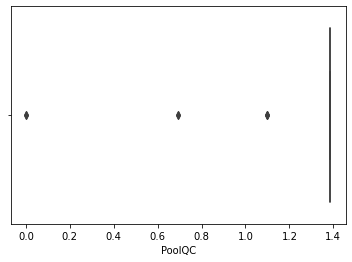

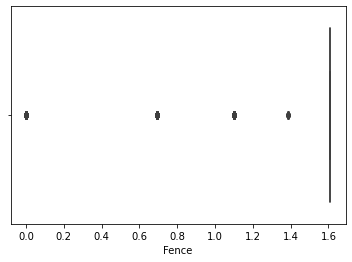

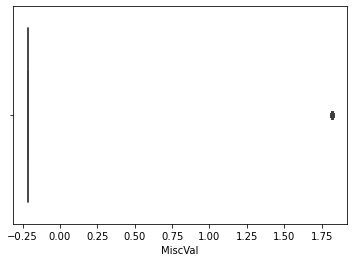

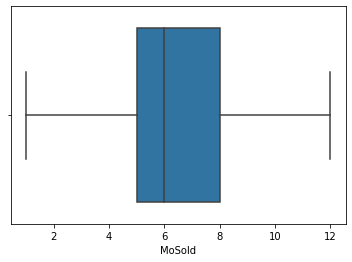

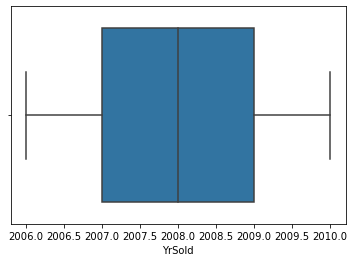

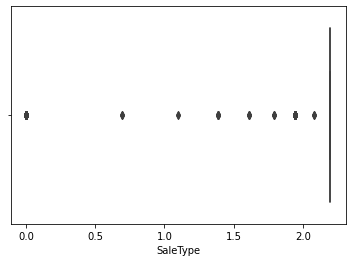

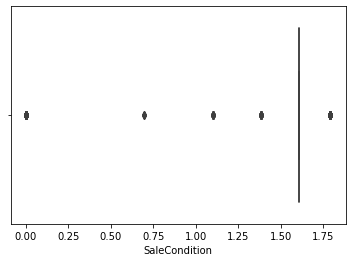

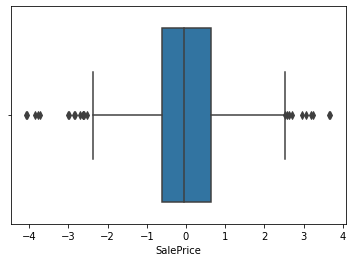

In [108]:
for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [109]:
from numpy import mean
from numpy import std




for i in cols:
    if isinstance(df[i][0], str) :
        continue
    else:
        #Calculating Mean and Std 
        mean, std = (df[i].mean(),df[i].std())
        # identify outliers
        cut_off = std*3
        lower, upper = mean - cut_off, mean + cut_off
        outliers = [x for x in df[i] if x < lower or x > upper]
        print('Identified outliers: %d' % len(outliers))
        df[i] = df[i].apply(lambda x: lower if x < lower else (upper if x > upper else x))


Identified outliers: 0
Identified outliers: 61
Identified outliers: 32
Identified outliers: 26
Identified outliers: 4
Identified outliers: 0
Identified outliers: 50
Identified outliers: 0
Identified outliers: 0
Identified outliers: 63
Identified outliers: 0
Identified outliers: 64
Identified outliers: 6
Identified outliers: 0
Identified outliers: 0
Identified outliers: 2
Identified outliers: 6
Identified outliers: 5
Identified outliers: 0
Identified outliers: 12
Identified outliers: 23
Identified outliers: 20
Identified outliers: 21
Identified outliers: 13
Identified outliers: 0
Identified outliers: 43
Identified outliers: 28
Identified outliers: 6
Identified outliers: 0
Identified outliers: 39
Identified outliers: 0
Identified outliers: 0
Identified outliers: 0
Identified outliers: 40
Identified outliers: 0
Identified outliers: 0
Identified outliers: 35
Identified outliers: 24
Identified outliers: 0
Identified outliers: 78
Identified outliers: 74
Identified outliers: 5
Identified outl

In [110]:
for i in cols:
    print(i, df[i].skew(),'\n')

MSSubClass 0.06400705160539474 

MSZoning -2.3784541749226022 

LotFrontage -0.8459655555559509 

LotArea -0.49340318191750315 

Street -17.02196927986139 

LotShape -0.6380476003905505 

LandContour -3.150944411805159 

Utilities 0 

LotConfig -1.2605104942826708 

LandSlope 3.954345429885624 

Neighborhood 0.043735292946020986 

Condition1 -0.11083110091100232 

Condition2 13.814192757091098 

BldgType 1.8564224519014532 

HouseStyle 0.2856801863402313 

OverallQual 0.2127361358991236 

OverallCond 0.32944105745718677 

YearBuilt -0.5976377337854485 

YearRemodAdd -0.49586353822203716 

RoofStyle 0.9384950784350876 

RoofMatl 6.919703090669049 

Exterior1st -1.171989697922303 

Exterior2nd -1.1754463434541824 

MasVnrType -0.823063511676946 

MasVnrArea 0.4395255589475427 

ExterQual -2.2025037488545003 

ExterCond -2.3874307663758385 

Foundation -0.1844120487559606 

BsmtQual -0.48752959452809685 

BsmtCond -2.8456182396518037 

BsmtExposure -1.2586496402978549 

BsmtFinType1 0.100

<AxesSubplot:xlabel='3SsnPorch', ylabel='Density'>

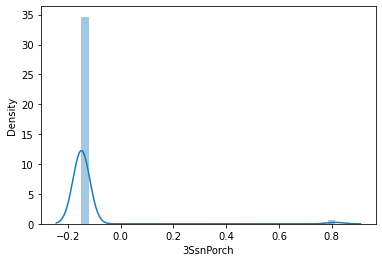

In [111]:
sns.distplot(df['3SsnPorch'])

<AxesSubplot:xlabel='PoolArea', ylabel='Density'>

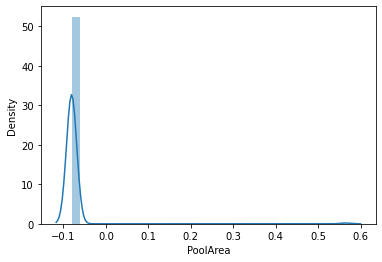

In [112]:
sns.distplot(df['PoolArea'])

<AxesSubplot:xlabel='MiscVal', ylabel='Density'>

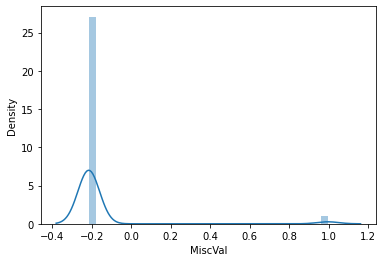

In [113]:
sns.distplot(df['MiscVal'])

These columns having high level of skewness basically has data imbalance according to the above plots

I shall treat this imbalance using ADASYN 

<AxesSubplot:xlabel='Street', ylabel='Density'>

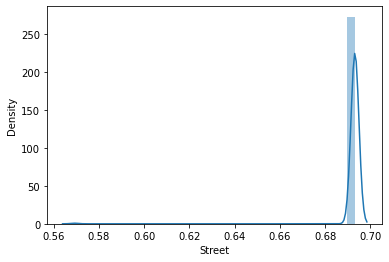

In [114]:
sns.distplot(df['Street'])

# Predicting Sales Price using Regression
 Let us now standardize the data using standardscalar transformation & then Check Multi colinearity using VIF
 

In [115]:
from sklearn.preprocessing import StandardScaler
x = df.drop(columns=["SalePrice"])
y=df["SalePrice"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

In [116]:
x_scaled.shape

(1168, 76)

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

MissingDataError: exog contains inf or nans

NameError: name 'exog' is not defined

In [121]:
cols=df.columns

for i in cols:
    print(i, df[i].isnull().sum(),'\n')

MSSubClass 0 

MSZoning 0 

LotFrontage 0 

LotArea 0 

Street 0 

LotShape 0 

LandContour 0 

Utilities 0 

LotConfig 0 

LandSlope 0 

Neighborhood 0 

Condition1 0 

Condition2 8 

BldgType 0 

HouseStyle 0 

OverallQual 0 

OverallCond 0 

YearBuilt 0 

YearRemodAdd 0 

RoofStyle 0 

RoofMatl 1 

Exterior1st 0 

Exterior2nd 0 

MasVnrType 0 

MasVnrArea 0 

ExterQual 0 

ExterCond 0 

Foundation 0 

BsmtQual 0 

BsmtCond 0 

BsmtExposure 0 

BsmtFinType1 0 

BsmtFinSF1 0 

BsmtFinType2 0 

BsmtFinSF2 0 

BsmtUnfSF 0 

TotalBsmtSF 0 

Heating 1 

HeatingQC 0 

CentralAir 0 

Electrical 0 

1stFlrSF 0 

2ndFlrSF 0 

LowQualFinSF 0 

GrLivArea 0 

BsmtFullBath 0 

BsmtHalfBath 0 

FullBath 0 

HalfBath 0 

BedroomAbvGr 0 

KitchenAbvGr 1 

KitchenQual 0 

TotRmsAbvGrd 0 

Functional 0 

Fireplaces 0 

FireplaceQu 0 

GarageType 0 

GarageYrBlt 0 

GarageFinish 0 

GarageCars 0 

GarageArea 0 

GarageQual 0 

PavedDrive 0 

WoodDeckSF 0 

OpenPorchSF 0 

EnclosedPorch 0 

3SsnPorch 0 

<AxesSubplot:xlabel='Condition2', ylabel='Density'>

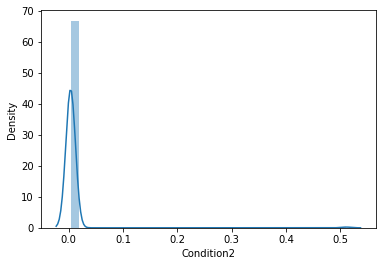

In [122]:
sns.distplot(df['Condition2'])

In [123]:
df['Condition2'].fillna(df['Condition2'].median(),inplace=True)

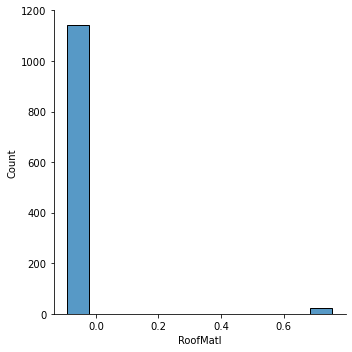

In [124]:
sns.displot(df['RoofMatl'])

In [130]:
df['RoofMatl'].fillna(df['RoofMatl'].mode()[0],inplace=True)

In [131]:
df['Heating'].fillna(df['Heating'].mode()[0],inplace=True)

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='Density'>

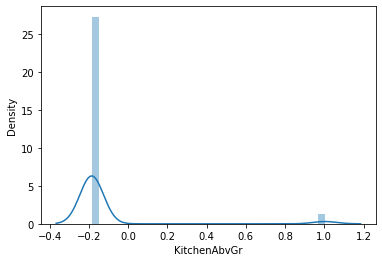

In [127]:
sns.distplot(df['KitchenAbvGr'])

In [132]:
df['KitchenAbvGr'].fillna(df['KitchenAbvGr'].mode()[0],inplace=True)

In [133]:
cols=df.columns

for i in cols:
    print(i, df[i].isnull().sum(),'\n')

MSSubClass 0 

MSZoning 0 

LotFrontage 0 

LotArea 0 

Street 0 

LotShape 0 

LandContour 0 

Utilities 0 

LotConfig 0 

LandSlope 0 

Neighborhood 0 

Condition1 0 

Condition2 0 

BldgType 0 

HouseStyle 0 

OverallQual 0 

OverallCond 0 

YearBuilt 0 

YearRemodAdd 0 

RoofStyle 0 

RoofMatl 0 

Exterior1st 0 

Exterior2nd 0 

MasVnrType 0 

MasVnrArea 0 

ExterQual 0 

ExterCond 0 

Foundation 0 

BsmtQual 0 

BsmtCond 0 

BsmtExposure 0 

BsmtFinType1 0 

BsmtFinSF1 0 

BsmtFinType2 0 

BsmtFinSF2 0 

BsmtUnfSF 0 

TotalBsmtSF 0 

Heating 0 

HeatingQC 0 

CentralAir 0 

Electrical 0 

1stFlrSF 0 

2ndFlrSF 0 

LowQualFinSF 0 

GrLivArea 0 

BsmtFullBath 0 

BsmtHalfBath 0 

FullBath 0 

HalfBath 0 

BedroomAbvGr 0 

KitchenAbvGr 0 

KitchenQual 0 

TotRmsAbvGrd 0 

Functional 0 

Fireplaces 0 

FireplaceQu 0 

GarageType 0 

GarageYrBlt 0 

GarageFinish 0 

GarageCars 0 

GarageArea 0 

GarageQual 0 

PavedDrive 0 

WoodDeckSF 0 

OpenPorchSF 0 

EnclosedPorch 0 

3SsnPorch 0 

In [138]:
from sklearn.preprocessing import StandardScaler
x = df.drop(columns=["SalePrice"])
y=df["SalePrice"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)


from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
pd.set_option('display.max_rows', 500)
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,6.842351,MSSubClass
1,1.395057,MSZoning
2,2.341542,LotFrontage
3,2.814088,LotArea
4,1.186349,Street
5,1.278504,LotShape
6,1.364709,LandContour
7,NaN,Utilities
8,1.144954,LotConfig
9,1.440587,LandSlope


let us drop the column PoolArea

In [140]:
x = df.drop(columns=["SalePrice","PoolArea"])
y=df["SalePrice"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

vif=pd.DataFrame()
pd.set_option('display.max_rows', 500)
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,6.842368,MSSubClass
1,1.395060,MSZoning
2,2.341653,LotFrontage
3,2.814640,LotArea
4,1.186360,Street
5,1.278509,LotShape
6,1.364714,LandContour
7,NaN,Utilities
8,1.144963,LotConfig
9,1.440623,LandSlope


In [141]:
x = df.drop(columns=["SalePrice","PoolArea","Utilities"])
y=df["SalePrice"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

vif=pd.DataFrame()
pd.set_option('display.max_rows', 500)
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,6.842368,MSSubClass
1,1.395060,MSZoning
2,2.341653,LotFrontage
3,2.814640,LotArea
4,1.186360,Street
5,1.278509,LotShape
6,1.364714,LandContour
7,1.144963,LotConfig
8,1.440623,LandSlope
9,1.308428,Neighborhood


In [142]:
x = df.drop(columns=["SalePrice","PoolArea","Utilities","GrLivArea"])
y=df["SalePrice"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

vif=pd.DataFrame()
pd.set_option('display.max_rows', 500)
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,6.696185,MSSubClass
1,1.395034,MSZoning
2,2.341611,LotFrontage
3,2.813125,LotArea
4,1.180117,Street
5,1.274996,LotShape
6,1.364349,LandContour
7,1.144920,LotConfig
8,1.436549,LandSlope
9,1.308350,Neighborhood


In [143]:
x = df.drop(columns=["SalePrice","PoolArea","Utilities","GrLivArea","YearBuilt"])
y=df["SalePrice"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

vif=pd.DataFrame()
pd.set_option('display.max_rows', 500)
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,6.581984,MSSubClass
1,1.382021,MSZoning
2,2.341208,LotFrontage
3,2.812502,LotArea
4,1.179992,Street
5,1.270846,LotShape
6,1.363276,LandContour
7,1.143957,LotConfig
8,1.432226,LandSlope
9,1.306059,Neighborhood


In [144]:
x = df.drop(columns=["SalePrice","PoolArea","Utilities","GrLivArea","YearBuilt","BsmtFinSF1"])
y=df["SalePrice"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

vif=pd.DataFrame()
pd.set_option('display.max_rows', 500)
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,6.581852,MSSubClass
1,1.375326,MSZoning
2,2.335484,LotFrontage
3,2.810260,LotArea
4,1.177758,Street
5,1.270814,LotShape
6,1.356093,LandContour
7,1.138224,LotConfig
8,1.432216,LandSlope
9,1.305959,Neighborhood


In [145]:
x = df.drop(columns=["SalePrice","PoolArea","Utilities","GrLivArea","YearBuilt","BsmtFinSF1","MSSubClass"])
y=df["SalePrice"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

vif=pd.DataFrame()
pd.set_option('display.max_rows', 500)
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.367086,MSZoning
1,2.334600,LotFrontage
2,2.810189,LotArea
3,1.177007,Street
4,1.269896,LotShape
5,1.355841,LandContour
6,1.138088,LotConfig
7,1.432188,LandSlope
8,1.305956,Neighborhood
9,1.195187,Condition1


In [146]:
x = df.drop(columns=["SalePrice","PoolArea","Utilities","GrLivArea","YearBuilt","BsmtFinSF1","MSSubClass","1stFlrSF"])
y=df["SalePrice"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

vif=pd.DataFrame()
pd.set_option('display.max_rows', 500)
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.366678,MSZoning
1,2.329915,LotFrontage
2,2.755130,LotArea
3,1.176906,Street
4,1.269884,LotShape
5,1.355739,LandContour
6,1.138080,LotConfig
7,1.428408,LandSlope
8,1.305607,Neighborhood
9,1.194088,Condition1


In [147]:
x = df.drop(columns=["SalePrice","PoolArea","Utilities","GrLivArea","YearBuilt","BsmtFinSF1","MSSubClass","1stFlrSF","GarageArea"])
y=df["SalePrice"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

vif=pd.DataFrame()
pd.set_option('display.max_rows', 500)
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.350567,MSZoning
1,2.326414,LotFrontage
2,2.730167,LotArea
3,1.176410,Street
4,1.264433,LotShape
5,1.355650,LandContour
6,1.137883,LotConfig
7,1.427274,LandSlope
8,1.305430,Neighborhood
9,1.189484,Condition1


In [148]:
x = df.drop(columns=["SalePrice","PoolArea","Utilities","GrLivArea","YearBuilt","BsmtFinSF1","MSSubClass","1stFlrSF",
                     "GarageArea","TotRmsAbvGrd"])
y=df["SalePrice"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

vif=pd.DataFrame()
pd.set_option('display.max_rows', 500)
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.345796,MSZoning
1,2.323686,LotFrontage
2,2.718093,LotArea
3,1.176350,Street
4,1.264349,LotShape
5,1.353025,LandContour
6,1.134450,LotConfig
7,1.420252,LandSlope
8,1.305278,Neighborhood
9,1.188609,Condition1


In [149]:
x = df.drop(columns=["SalePrice","PoolArea","Utilities","GrLivArea","YearBuilt","BsmtFinSF1","MSSubClass","1stFlrSF",
                     "GarageArea","TotRmsAbvGrd","TotalBsmtSF"])
y=df["SalePrice"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

vif=pd.DataFrame()
pd.set_option('display.max_rows', 500)
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.344519,MSZoning
1,2.323685,LotFrontage
2,2.679100,LotArea
3,1.176339,Street
4,1.264314,LotShape
5,1.352854,LandContour
6,1.134440,LotConfig
7,1.417416,LandSlope
8,1.302220,Neighborhood
9,1.188058,Condition1


In [150]:
x = df.drop(columns=["SalePrice","PoolArea","Utilities","GrLivArea","YearBuilt","BsmtFinSF1","MSSubClass","1stFlrSF",
                     "GarageArea","TotRmsAbvGrd","TotalBsmtSF","OverallQual"])
y=df["SalePrice"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

vif=pd.DataFrame()
pd.set_option('display.max_rows', 500)
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.343764,MSZoning
1,2.322552,LotFrontage
2,2.679098,LotArea
3,1.173092,Street
4,1.264066,LotShape
5,1.352168,LandContour
6,1.134203,LotConfig
7,1.408687,LandSlope
8,1.295434,Neighborhood
9,1.187852,Condition1


In [151]:
x = df.drop(columns=["SalePrice","PoolArea","Utilities","GrLivArea","YearBuilt","BsmtFinSF1","MSSubClass","1stFlrSF",
                     "GarageArea","TotRmsAbvGrd","TotalBsmtSF","OverallQual","Exterior1st"])
y=df["SalePrice"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

vif=pd.DataFrame()
pd.set_option('display.max_rows', 500)
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.343748,MSZoning
1,2.320452,LotFrontage
2,2.676181,LotArea
3,1.173089,Street
4,1.263761,LotShape
5,1.352057,LandContour
6,1.134007,LotConfig
7,1.406170,LandSlope
8,1.295262,Neighborhood
9,1.187228,Condition1


In [152]:
x = df.drop(columns=["SalePrice","PoolArea","Utilities","GrLivArea","YearBuilt","BsmtFinSF1","MSSubClass","1stFlrSF",
                     "GarageArea","TotRmsAbvGrd","TotalBsmtSF","OverallQual","Exterior1st","BsmtFinSF2"])
y=df["SalePrice"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

vif=pd.DataFrame()
pd.set_option('display.max_rows', 500)
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.343455,MSZoning
1,2.318453,LotFrontage
2,2.674693,LotArea
3,1.173037,Street
4,1.263381,LotShape
5,1.352057,LandContour
6,1.132456,LotConfig
7,1.405683,LandSlope
8,1.294606,Neighborhood
9,1.185079,Condition1


In [153]:
x = df.drop(columns=["SalePrice","PoolArea","Utilities","GrLivArea","YearBuilt","BsmtFinSF1","MSSubClass","1stFlrSF",
                     "GarageArea","TotRmsAbvGrd","TotalBsmtSF","OverallQual","Exterior1st","BsmtFinSF2","GarageYrBlt"])
y=df["SalePrice"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

vif=pd.DataFrame()
pd.set_option('display.max_rows', 500)
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.337894,MSZoning
1,2.316742,LotFrontage
2,2.661307,LotArea
3,1.173027,Street
4,1.260587,LotShape
5,1.350357,LandContour
6,1.129251,LotConfig
7,1.404858,LandSlope
8,1.293675,Neighborhood
9,1.184150,Condition1


In [154]:
df.shape

(1168, 77)

In [155]:
x_scaled.shape

(1168, 62)

In [159]:
X=x_scaled
X=pd.DataFrame(x,columns=x.columns)

Data seems clean now

Let us now move on to the Model Building part

# Model Fitting and Selection
First I shall check the best possible random state to train our model. Using LogisticRegression to check and then later will run with other models

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor


In [161]:
minMSE=1
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    mse=mean_squared_error(y_test,pred)
    if mse<minMSE:
        minMSE=mse
        maxRS=i
print('Best MSE',minMSE,' on Random state',maxRS)

Best MSE 0.31304608043555393  on Random state 120


In [162]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=120)

In [163]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsRegressor(n_neighbors=5)
rfc=RandomForestRegressor(n_estimators=100)
dt=DecisionTreeRegressor()
gnb=GaussianNB()
ad=AdaBoostRegressor(n_estimators=100)
et=ExtraTreeRegressor()

In [164]:
import math
from math import sqrt

model=(knn,rfc,dt,ad,et)
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('r2 score of',m)
    print(r2_score(y_test,pred))
    print('MAE:',mean_absolute_error(y_test,pred))
    print('MSE:',mean_squared_error(y_test,pred))
    print('RMSE:',sqrt(mean_squared_error(y_test,pred)))
    print('-------------------------------------------------------------------------------------------')

r2 score of KNeighborsRegressor()
0.6862651395815919
MAE: 0.4180288978844189
MSE: 0.32850558967164356
RMSE: 0.5731540714953036
-------------------------------------------------------------------------------------------
r2 score of RandomForestRegressor()
0.8325041101213786
MAE: 0.29251841570532694
MSE: 0.17538164550401597
RMSE: 0.4187859184643342
-------------------------------------------------------------------------------------------
r2 score of DecisionTreeRegressor()
0.6507430934569511
MAE: 0.4357895358591083
MSE: 0.3657000241471621
RMSE: 0.6047313652748318
-------------------------------------------------------------------------------------------
r2 score of AdaBoostRegressor(n_estimators=100)
0.7985116197404895
MAE: 0.3507110590772267
MSE: 0.2109745123027177
RMSE: 0.4593196188959467
-------------------------------------------------------------------------------------------
r2 score of ExtraTreeRegressor()
0.6332581916664681
MAE: 0.455998444630071
MSE: 0.3840081202426139
RMSE: 0.

In [165]:
from sklearn.model_selection import cross_val_score

for m in model:
    score=cross_val_score(m,X,y,cv=10, scoring='neg_root_mean_squared_error')
    print('RMSE of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')

RMSE of KNeighborsRegressor()
-0.5561369268021668
-------------------------------------------------------------------------------
RMSE of RandomForestRegressor()
-0.414758033697459
-------------------------------------------------------------------------------
RMSE of DecisionTreeRegressor()
-0.6290165616536638
-------------------------------------------------------------------------------
RMSE of AdaBoostRegressor(n_estimators=100)
-0.47096293762399977
-------------------------------------------------------------------------------
RMSE of ExtraTreeRegressor()
-0.6237392655393252
-------------------------------------------------------------------------------


Again RFC is giving the least difference between test RMSE and CV RMSE

# Hyperparameter Tuning
Let's tune the parameters using GridSearchCV

In [166]:
params = {"n_estimators":[20, 100,120, 140],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rfc,param_grid = params,cv=5,n_jobs=-1) # Use all the cores in your system to improve performance

grid_search.fit(x_train,y_train)
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 140}


In [167]:
Finalmod=RandomForestRegressor(max_depth= 15, min_samples_leaf=5, min_samples_split= 10, n_estimators=140)
Finalmod.fit(x_train,y_train)
y_pred=Finalmod.predict(x_test)
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=(mean_squared_error(y_test,y_pred,squared=False))
mae=mean_absolute_error(y_test,y_pred)
print("Performance of the model after tuning: MSE, MAE,RMSE,R2 ----",mse,rmse,mae, r2)


Performance of the model after tuning: MSE, MAE,RMSE,R2 ---- 0.1967759108462003 0.443594308852357 0.3131426956017914 0.8120718037560786


Model r2 score does not improve, so let us use RandomizedSearchCv

In [168]:
from sklearn.model_selection import RandomizedSearchCV
params = {"n_estimators":[20, 100,120, 140],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}

rnd_srch = RandomizedSearchCV(RandomForestRegressor(),cv=5,param_distributions=params)
rnd_srch.fit(x_train,y_train)

rnd_srch.best_estimator_

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=11,
                      n_estimators=140)

In [170]:
Finalmod2=RandomForestRegressor(max_depth= 15, min_samples_leaf=5, min_samples_split= 11, n_estimators=140)
Finalmod2.fit(x_train,y_train)
y_pred=Finalmod2.predict(x_test)
r2=r2_score(y_test,y_pred)
gb_mse=mean_squared_error(y_test,y_pred)
gb_rmse=(mean_squared_error(y_test,y_pred,squared=False))
gb_mae=mean_absolute_error(y_test,y_pred)
print("Performance of the model after tuning: MSE, MAE,RMSE,R2 ----",gb_mse,gb_rmse,gb_mae, r2)


Performance of the model after tuning: MSE, MAE,RMSE,R2 ---- 0.1940922343066192 0.440559002071935 0.3073510539488573 0.8146348130655859


All the errors are very small & the R-squared value is 81% , so this is our final model

In [171]:
import joblib
joblib.dump(Finalmod,'HousingProject_Regression')

['HousingProject_Regression']

In [173]:
# Feature Selection

from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestRegressor())

In [174]:
sel.get_support()

array([False,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [175]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

11

In [176]:
print(selected_feat)

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'ExterQual',
       'BsmtQual', '2ndFlrSF', 'FullBath', 'Fireplaces', 'GarageType',
       'GarageCars'],
      dtype='object')


# Applying the saved model on the test data

In [179]:
# save the model to disk
import pickle
filename = 'Finalmod2.sav'
pickle.dump(model, open(filename, 'wb'))
 


In [180]:
testdf= pd.read_csv(r"C:\Users\bipas\Downloads\Project-Housing--2---1---1-\Project-Housing_splitted\test.csv")

In [181]:
testdf

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
5,650,180,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,131,GLQ,499,0,630,GasA,Gd,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,TA,3,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal
6,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
7,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,436.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1400,Unf,0,310,1710,GasA,Ex,Y,SBrkr,1710,0,0,1710,1,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,866,TA,TA,Y,0,102,0,0,0,0,NaN,NaN,NaN,0,1,2008,New,Partial
8,427,80,RL,NaN,12800,Pave,NaN,Reg,Low,AllPub,Inside,Mod,SawyerW,Norm,Norm,1Fam,SLvl,7,5,1989,1989,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,145.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1518,Unf,0,0,1518,GasA,Gd,Y,SBrkr,1644,0,0,1644,1,1,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1989.0,Fin,2,569,TA,TA,Y,80,0,0,0,396,0,NaN,NaN,NaN,0,8,2009,WD,Normal
9,776,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Mitchel,Norm,Norm,TwnhsE,1Story,6,5,1998,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,320.0,TA,TA,PConc,Ex,TA,No,GLQ,866,Unf,0,338,1204,GasA,Ex,Y,SBrkr,1204,0,0,1204,1,0,2,0,2,1,TA,5,Typ,0,NaN,Attchd,1998.0,Fin,2,412,TA,TA,

In [184]:
testdf= pd.read_csv(r"C:\Users\bipas\Downloads\Project-Housing--2---1---1-\Project-Housing_splitted\test.csv")
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_pred=Finalmod.predict(testdf)
print(testdf)

ValueError: could not convert string to float: 'RL'